In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf

In [2]:
df = pd.read_csv(r'C:\Users\Elizabeth\Documents\Data Analytics\course\TERM4\EN_APEI-Can-Prov_Terr.csv', encoding = 'latin1')
df.head()

,Index,Region,Source,Sector,Subsector,Is it a total,Year,TPM (t),PM10 (t),PM25 (t),...,Pb (kg),Cd (kg),Hg (kg),D/F (gTEQ),B(a)p,B(b)f,B(k)f,"I(1,2,3-cd)p",PAH (kg),HCB (g)
0,1.0,AB,Ore and Mineral Industries,NaN,NaN,y,1990.0,27838.262007,8171.573406,2874.894219,...,416.163534,5.772593,92.824010,0.002173,0.407351,1.425729,0.505794,0.407351,2.746226,NaN
1,1.0,BC,Ore and Mineral Industries,NaN,NaN,y,1990.0,24263.863642,11296.732082,6158.367847,...,57.772251,1.846344,3084.899405,0.000143,9.164659,12.693411,12.110903,5.062677,39.031650,NaN
2,1.0,Unspecified,Ore and Mineral Industries,NaN,NaN,y,1990.0,NaN,NaN,NaN,...,942553.747399,78483.801189,NaN,42.093600,26870.500000,25789.000000,16893.400000,10092.900000,79645.800000,5466.35
3,1.0,MB,Ore and Mineral Industries,NaN,NaN,y,1990.0,10781.344640,6530.918616,3287.360693,...,28.563421,0.525974,19959.679177,0.000143,0.037110,0.129885,0.046078,0.037110,0.250183,NaN
4,1.0,NB,Ore and Mineral Industries,NaN,NaN,y,1990.0,4856.683941,1529.098805,651.456258,...,18.294893,0.949639,121.556350,0.000066,0.099055,0.346693,0.122993,0.099055,0.667797,NaN


In [3]:
colnames = df.columns
colnames

Index(['Index', 'Region', 'Source', 'Sector', 'Subsector', 'Is it a total',
       'Year', 'TPM (t)', 'PM10 (t)', 'PM25 (t)', 'SOX (t)', 'NOX (t)',
       'VOC (t)', 'CO (t)', 'NH3 (t)', 'Pb (kg)', 'Cd (kg)', 'Hg (kg)',
       'D/F (gTEQ)', 'B(a)p', 'B(b)f', 'B(k)f', 'I(1,2,3-cd)p', 'PAH (kg)',
       'HCB (g)'],
      dtype='object')

In [4]:
df.rename(columns = {'Is it a total':'total', 'TPM (t)':'TPM', 'PM10 (t)':'PM10', 'PM25 (t)':'PM25', 'SOX (t)':'SOX',
                    'NOX (t)':'NOX', 'VOC (t)':'VOC', 'CO (t)':'CO', 'NH3 (t)':'NH3', 'Pb (kg)':'Pb', 'Cd (kg)':'Cd',
                    'Hg (kg)':'Hg','D/F (gTEQ)':'DF', 'B(a)p':'Bap', 'B(b)f':'Bbf', 'B(k)f':'Bkf', 'I(1,2,3-cd)p':'Ip', 
                     'PAH (kg)':'PAH', 'HCB (g)':'HCB'}, inplace = True)

In [5]:
pip install pandas-profiling[notebook]

Note: you may need to restart the kernel to use updated packages.


In [5]:
from pandas_profiling import ProfileReport

In [6]:
profile = df.profile_report(title = "Pandas Profiling Report")
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.dtypes

Index        float64
Region        object
Source        object
Sector        object
Subsector     object
total         object
Year         float64
TPM          float64
PM10         float64
PM25         float64
SOX          float64
NOX          float64
VOC          float64
CO           float64
NH3          float64
Pb           float64
Cd           float64
Hg           float64
DF           float64
Bap          float64
Bbf          float64
Bkf          float64
Ip           float64
PAH          float64
HCB          float64
dtype: object

In [6]:
df.shape

(66390, 25)

In [7]:
#change type of Index and Year from float64 and object respectively to int32
df['Index'] = df['Index'].astype('int')
#df['Year'] = pd.to_datetime(df['Year'])
df['Year'] = df['Year'].astype('int')
df.dtypes

Index          int32
Region        object
Source        object
Sector        object
Subsector     object
total         object
Year           int32
TPM          float64
PM10         float64
PM25         float64
SOX          float64
NOX          float64
VOC          float64
CO           float64
NH3          float64
Pb           float64
Cd           float64
Hg           float64
DF           float64
Bap          float64
Bbf          float64
Bkf          float64
Ip           float64
PAH          float64
HCB          float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66390 entries, 0 to 66389
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      66390 non-null  int32  
 1   Region     66390 non-null  object 
 2   Source     66390 non-null  object 
 3   Sector     61320 non-null  object 
 4   Subsector  54180 non-null  object 
 5   total      12210 non-null  object 
 6   Year       66390 non-null  int32  
 7   TPM        34032 non-null  float64
 8   PM10       33960 non-null  float64
 9   PM25       34002 non-null  float64
 10  SOX        24136 non-null  float64
 11  NOX        25801 non-null  float64
 12  VOC        30948 non-null  float64
 13  CO         25757 non-null  float64
 14  NH3        22634 non-null  float64
 15  Pb         13164 non-null  float64
 16  Cd         11829 non-null  float64
 17  Hg         20301 non-null  float64
 18  DF         14676 non-null  float64
 19  Bap        14065 non-null  float64
 20  Bbf   

In [9]:
#Count of NA's per column
df.isna().sum()

Index            0
Region           0
Source           0
Sector        5070
Subsector    12210
total        54180
Year             0
TPM          32358
PM10         32430
PM25         32388
SOX          42254
NOX          40589
VOC          35442
CO           40633
NH3          43756
Pb           53226
Cd           54561
Hg           46089
DF           51714
Bap          52325
Bbf          52386
Bkf          52787
Ip           52531
PAH          52933
HCB          59060
dtype: int64

<AxesSubplot:>

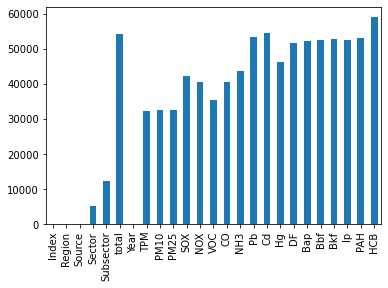

In [10]:
#Visualize the sum of NA's of each features
df.isna().sum()[df.isna().sum() >= 0].plot(kind = 'bar')

In [11]:
#total NA's of the dataset
df.isna().sum().sum()

898922

In [12]:
df1 = df.describe()
print(round(df1, 2))

          Index      Year          TPM        PM10        PM25         SOX  \
count  66390.00  66390.00     34032.00    33960.00    34002.00    24136.00   
mean      79.54   2004.50     84379.95    26902.43     5663.52    10932.16   
std       45.63      8.66    833510.51   260958.74    51617.32    82698.84   
min        1.00   1990.00         0.00        0.00        0.00        0.00   
25%       40.00   1997.00        10.40        7.26        4.35        1.48   
50%       80.00   2004.50       149.95      101.47       60.49       45.89   
75%      119.00   2012.00      1606.78      951.23      519.88      811.31   
max      158.00   2019.00  28912967.21  8880675.05  1690838.10  3004321.65   

              NOX         VOC           CO        NH3          Pb        Cd  \
count    25801.00    30948.00     25757.00   22634.00    13164.00  11829.00   
mean     10775.76     9748.23     39647.74    2677.07     4968.40    406.64   
std      85643.38    84028.98    331672.54   20532.46    431

In [13]:
#Determine number of entries for each of the Regions
df['Region'].value_counts(dropna=False).sort_index(ascending = True)

AB             4740
BC             4740
CA               30
MB             4740
NB             4740
NL             4740
NS             4740
NT             4740
NU             4740
ON             4740
PE             4740
QC             4740
SK             4740
Unspecified    4740
YT             4740
Name: Region, dtype: int64

In [14]:
#2019 Pollutants Emissions Inventory Report shows that TPM, PM10, PM25, and NH3
#displayed increase in emanation

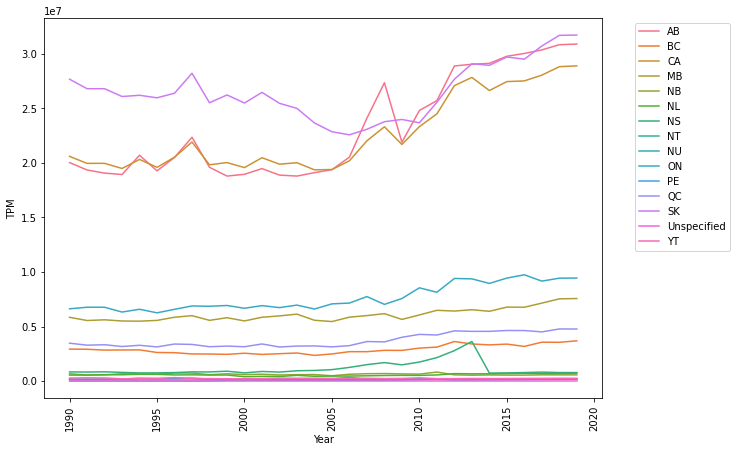

In [15]:
#Visualize trends of the TPM pollutants emissions of all the Regions
dfg = df.groupby(['Year', 'Region']).agg({'TPM': sum}).reset_index()
plt.figure(figsize = (10, 7))
sns.lineplot(x = 'Year', y = 'TPM', data = dfg, hue = 'Region')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.xticks(rotation = 90)
plt.show()

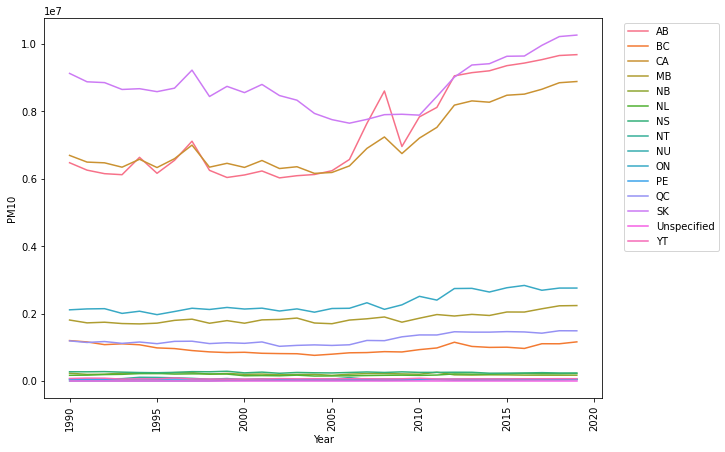

In [16]:
#Visualize trends of the PM10 pollutants emissions of all the Regions
dfg = df.groupby(['Year', 'Region']).agg({'PM10': sum}).reset_index()
plt.figure(figsize = (10, 7))
sns.lineplot(x = 'Year', y = 'PM10', data = dfg, hue = 'Region')
plt.legend(bbox_to_anchor = (1.03, 1), loc = 'upper left')
plt.xticks(rotation = 90)
plt.show()

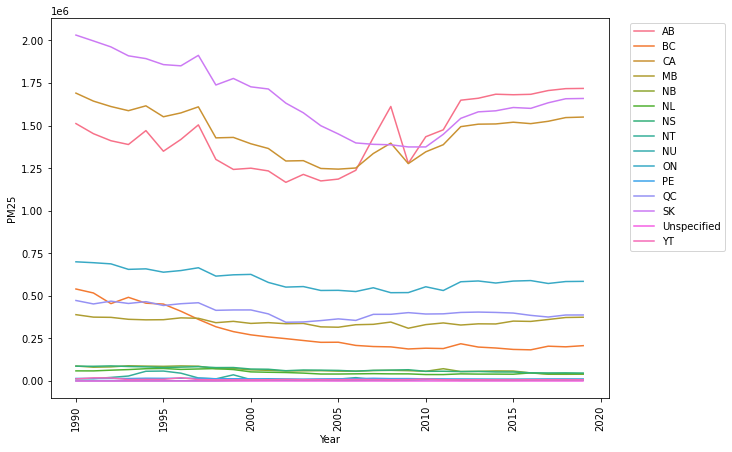

In [17]:
#Visualize trends of the PM25 pollutants emissions of all the Regions
dfg = df.groupby(['Year', 'Region']).agg({'PM25': sum}).reset_index()
plt.figure(figsize = (10, 7))
sns.lineplot(x = 'Year', y = 'PM25', data = dfg, hue = 'Region')
plt.legend(bbox_to_anchor = (1.03, 1), loc = 'upper left')
plt.xticks(rotation = 90)
plt.show()

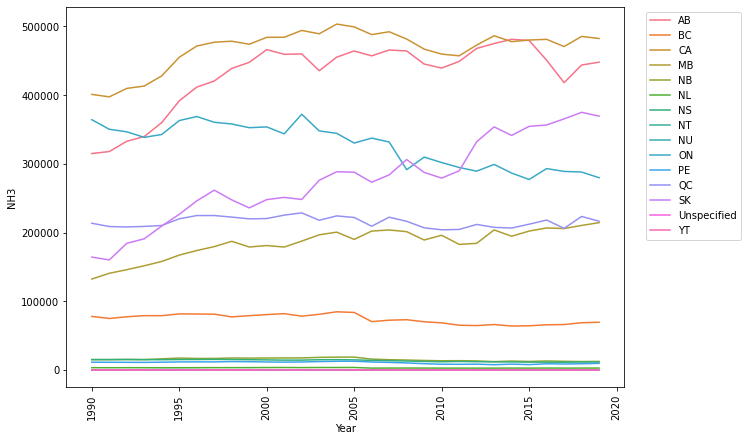

In [18]:
#Visualize trends of the NH3 pollutants emissions of all the Regions
dfg = df.groupby(['Year', 'Region']).agg({'NH3': sum}).reset_index()
plt.figure(figsize = (10, 7))
sns.lineplot(x ='Year', y ='NH3', data = dfg, hue = 'Region')
plt.legend(bbox_to_anchor = (1.03, 1), loc = 'upper left')
plt.xticks(rotation = 90)
plt.show()

In [19]:
#Check Region, if with missing values. Result shows no missing values.
Region_count = sum(df['Region'].value_counts(dropna = False))
Region_count

66390

In [20]:
pd.set_option('display.max_rows', None)

In [21]:
#Check Source classifications, if with missing values
df['Source'].value_counts(dropna = False).sort_index(ascending = False)

Transportation and Mobile Equipment          7140
Paints and Solvents                          2100
Ore and Mineral Industries                  16380
Oil and Gas Industry                         7980
Manufacturing                               12600
Incineration and Waste                       5460
GRAND TOTAL                                   450
Fires                                        1260
Electric Power Generation (Utilities)        2520
Dust                                         2520
Commercial/Residential/Institutional          420
Commercial / Residential / Institutional     3780
Agriculture                                  3780
Name: Source, dtype: int64

In [22]:
#GRAND TOTAL deleted
df.drop(df[df['Source'] == 'GRAND TOTAL' ].index, inplace = True)

In [23]:
#Df rows reduced to 65940
Source_count = sum(df['Source'].value_counts(dropna = False))
Source_count

65940

In [24]:
#Combine "Commercial / Residential / Institutional" and "Commercial/Residential/Institutional"
df.replace("Commercial / Residential / Institutional", "Commercial/Residential/Institutional", inplace = True)
df['Source'].value_counts(dropna = False).sort_index(ascending = False)

Transportation and Mobile Equipment       7140
Paints and Solvents                       2100
Ore and Mineral Industries               16380
Oil and Gas Industry                      7980
Manufacturing                            12600
Incineration and Waste                    5460
Fires                                     1260
Electric Power Generation (Utilities)     2520
Dust                                      2520
Commercial/Residential/Institutional      4200
Agriculture                               3780
Name: Source, dtype: int64

In [25]:
df['Source'].isna().sum()

0

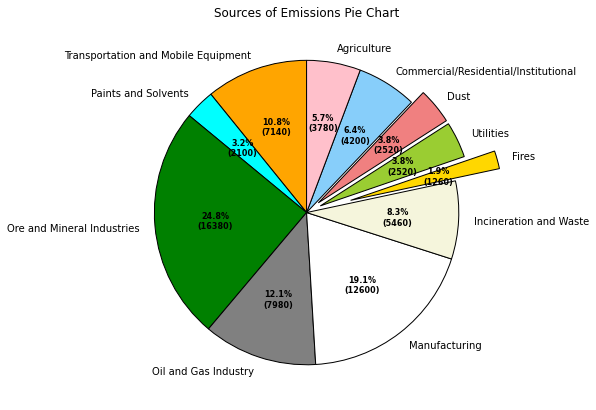

In [26]:
#Visualize distribution of entries for feature: "Sources"
df['Source'].value_counts (dropna = False)

Source = ['Transportation and Mobile Equipment', 'Paints and Solvents', 'Ore and Mineral Industries', 'Oil and Gas Industry',
        'Manufacturing', 'Incineration and Waste', 'Fires', 'Utilities', 'Dust', 'Commercial/Residential/Institutional',
        'Agriculture'] 
data = [7140, 2100, 16380, 7980, 12600, 5460, 1260, 2520, 2520, 4200, 3780]
explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.1, 0.1, 0.0, 0.0)
colors = ( 'orange', 'cyan', 'green', 'grey', 'white', 'beige',
          'gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'pink')  
wp = { 'linewidth' : 1, 'edgecolor' : 'black' } 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return '{:.1f}%\n({:d})'.format(pct, absolute)
fig, ax = plt.subplots(figsize = (10, 7)) 
wedges, texts, autotexts = ax.pie(data,  
    autopct = lambda pct: func(pct, data), 
    explode = explode,
    labels = Source,  
    colors = colors, 
    startangle = 90, 
    wedgeprops = wp, 
    textprops = dict(color = 'black')) 

plt.setp(autotexts, size = 8, weight = 'bold')

ax.set_title('Sources of Emissions Pie Chart')

plt.show() 

In [27]:
#Check Sector, if with missing values
df['Sector'].value_counts(dropna=False).sort_index(ascending = True)

Abrasives Manufacturing                                        420
Air Transportation (LTO)                                       420
Aluminium Industry                                            1680
Animal Production                                              420
Asphalt Paving Industry                                        420
Bakeries                                                       420
Biofuel Production                                             420
Cement and Concrete Industry                                  2100
Chemicals Industry                                            3360
Coal                                                           420
Coal Transportation                                            420
Commercial Cooking                                             420
Commercial and Institutional Fuel Combustion                   420
Construction Fuel Combustion                                   420
Construction Operations                                       

In [28]:
#Fill in missing values for Sector
df['Sector'] = df['Sector'].fillna('Unspecified')
df['Sector'].value_counts(dropna = False).sort_index(ascending = True)

Abrasives Manufacturing                                        420
Air Transportation (LTO)                                       420
Aluminium Industry                                            1680
Animal Production                                              420
Asphalt Paving Industry                                        420
Bakeries                                                       420
Biofuel Production                                             420
Cement and Concrete Industry                                  2100
Chemicals Industry                                            3360
Coal                                                           420
Coal Transportation                                            420
Commercial Cooking                                             420
Commercial and Institutional Fuel Combustion                   420
Construction Fuel Combustion                                   420
Construction Operations                                       

In [29]:
df['Sector'].isna().sum()

0

In [30]:
#Check Subsector, if with missing values
df['Subsector'].value_counts(dropna = False).sort_index(ascending = True)

Abrasives Manufacturing                                         420
Accidents and Equipment Failures                                420
Air Transportation (LTO)                                        420
Alumina (Bauxite Refining)                                      420
Animal Production                                               420
Asphalt Paving Industry                                         420
Bakeries                                                        420
Biofuel Production                                              420
Biological Treatment of Waste                                   420
Brick Products                                                  420
Cement Manufacturing                                            420
Chemical Manufacturing                                          420
Clay Products                                                   420
Cleaning Compound Manufacturing                                 420
Coal                                            

In [31]:
#Fill in missing values for Subsector
df['Subsector'] = df['Subsector'].fillna('No Subsector')
df['Subsector'].value_counts(dropna = False).sort_index(ascending = True)

Abrasives Manufacturing                                         420
Accidents and Equipment Failures                                420
Air Transportation (LTO)                                        420
Alumina (Bauxite Refining)                                      420
Animal Production                                               420
Asphalt Paving Industry                                         420
Bakeries                                                        420
Biofuel Production                                              420
Biological Treatment of Waste                                   420
Brick Products                                                  420
Cement Manufacturing                                            420
Chemical Manufacturing                                          420
Clay Products                                                   420
Cleaning Compound Manufacturing                                 420
Coal                                            

In [32]:
df['Subsector'].isna().sum()

0

In [33]:
#Check missing values for total
df['total'].value_counts(dropna = False)

NaN    54180
y      11760
Name: total, dtype: int64

In [34]:
#Fill in missing values for total
df['total'] = df['total'].fillna('n')
df['total'].value_counts(dropna = False)

n    54180
y    11760
Name: total, dtype: int64

In [35]:
df['total'].isna().sum()

0

In [36]:
#Delete all "Unspecified" as Region entry
df1 = df[df.Region != 'Unspecified']
df1.head()

,Index,Region,Source,Sector,Subsector,total,Year,TPM,PM10,PM25,...,Pb,Cd,Hg,DF,Bap,Bbf,Bkf,Ip,PAH,HCB
0,1,AB,Ore and Mineral Industries,Unspecified,No Subsector,y,1990,27838.262007,8171.573406,2874.894219,...,416.163534,5.772593,92.824010,0.002173,0.407351,1.425729,0.505794,0.407351,2.746226,NaN
1,1,BC,Ore and Mineral Industries,Unspecified,No Subsector,y,1990,24263.863642,11296.732082,6158.367847,...,57.772251,1.846344,3084.899405,0.000143,9.164659,12.693411,12.110903,5.062677,39.031650,NaN
3,1,MB,Ore and Mineral Industries,Unspecified,No Subsector,y,1990,10781.344640,6530.918616,3287.360693,...,28.563421,0.525974,19959.679177,0.000143,0.037110,0.129885,0.046078,0.037110,0.250183,NaN
4,1,NB,Ore and Mineral Industries,Unspecified,No Subsector,y,1990,4856.683941,1529.098805,651.456258,...,18.294893,0.949639,121.556350,0.000066,0.099055,0.346693,0.122993,0.099055,0.667797,NaN
5,1,NL,Ore and Mineral Industries,Unspecified,No Subsector,y,1990,26990.264763,3670.509960,1494.637876,...,46.037566,0.383072,62.834248,0.000244,0.012756,0.044645,0.015838,0.012756,0.085994,NaN


In [37]:
#Delete all "CA" as Region entry
df2 = df1[df1.Region != 'CA']
df2.head()

,Index,Region,Source,Sector,Subsector,total,Year,TPM,PM10,PM25,...,Pb,Cd,Hg,DF,Bap,Bbf,Bkf,Ip,PAH,HCB
0,1,AB,Ore and Mineral Industries,Unspecified,No Subsector,y,1990,27838.262007,8171.573406,2874.894219,...,416.163534,5.772593,92.824010,0.002173,0.407351,1.425729,0.505794,0.407351,2.746226,NaN
1,1,BC,Ore and Mineral Industries,Unspecified,No Subsector,y,1990,24263.863642,11296.732082,6158.367847,...,57.772251,1.846344,3084.899405,0.000143,9.164659,12.693411,12.110903,5.062677,39.031650,NaN
3,1,MB,Ore and Mineral Industries,Unspecified,No Subsector,y,1990,10781.344640,6530.918616,3287.360693,...,28.563421,0.525974,19959.679177,0.000143,0.037110,0.129885,0.046078,0.037110,0.250183,NaN
4,1,NB,Ore and Mineral Industries,Unspecified,No Subsector,y,1990,4856.683941,1529.098805,651.456258,...,18.294893,0.949639,121.556350,0.000066,0.099055,0.346693,0.122993,0.099055,0.667797,NaN
5,1,NL,Ore and Mineral Industries,Unspecified,No Subsector,y,1990,26990.264763,3670.509960,1494.637876,...,46.037566,0.383072,62.834248,0.000244,0.012756,0.044645,0.015838,0.012756,0.085994,NaN


In [38]:
#Get rid of the infinite values and fill in other missing values with zero value because 
#as indicated in the APEI Report, NAN means no emissions
df2.replace([np.inf, -np.inf], np.nan, inplace=True)
df2.fillna(value=0, inplace=True)
df2.head()

,Index,Region,Source,Sector,Subsector,total,Year,TPM,PM10,PM25,...,Pb,Cd,Hg,DF,Bap,Bbf,Bkf,Ip,PAH,HCB
0,1,AB,Ore and Mineral Industries,Unspecified,No Subsector,y,1990,27838.262007,8171.573406,2874.894219,...,416.163534,5.772593,92.824010,0.002173,0.407351,1.425729,0.505794,0.407351,2.746226,0.0
1,1,BC,Ore and Mineral Industries,Unspecified,No Subsector,y,1990,24263.863642,11296.732082,6158.367847,...,57.772251,1.846344,3084.899405,0.000143,9.164659,12.693411,12.110903,5.062677,39.031650,0.0
3,1,MB,Ore and Mineral Industries,Unspecified,No Subsector,y,1990,10781.344640,6530.918616,3287.360693,...,28.563421,0.525974,19959.679177,0.000143,0.037110,0.129885,0.046078,0.037110,0.250183,0.0
4,1,NB,Ore and Mineral Industries,Unspecified,No Subsector,y,1990,4856.683941,1529.098805,651.456258,...,18.294893,0.949639,121.556350,0.000066,0.099055,0.346693,0.122993,0.099055,0.667797,0.0
5,1,NL,Ore and Mineral Industries,Unspecified,No Subsector,y,1990,26990.264763,3670.509960,1494.637876,...,46.037566,0.383072,62.834248,0.000244,0.012756,0.044645,0.015838,0.012756,0.085994,0.0


In [39]:
df2.isna().sum()

Index        0
Region       0
Source       0
Sector       0
Subsector    0
total        0
Year         0
TPM          0
PM10         0
PM25         0
SOX          0
NOX          0
VOC          0
CO           0
NH3          0
Pb           0
Cd           0
Hg           0
DF           0
Bap          0
Bbf          0
Bkf          0
Ip           0
PAH          0
HCB          0
dtype: int64

In [40]:
#round to two decimal places
df3 = df2.round()
df3.head()

,Index,Region,Source,Sector,Subsector,total,Year,TPM,PM10,PM25,...,Pb,Cd,Hg,DF,Bap,Bbf,Bkf,Ip,PAH,HCB
0,1,AB,Ore and Mineral Industries,Unspecified,No Subsector,y,1990,27838.0,8172.0,2875.0,...,416.0,6.0,93.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0
1,1,BC,Ore and Mineral Industries,Unspecified,No Subsector,y,1990,24264.0,11297.0,6158.0,...,58.0,2.0,3085.0,0.0,9.0,13.0,12.0,5.0,39.0,0.0
3,1,MB,Ore and Mineral Industries,Unspecified,No Subsector,y,1990,10781.0,6531.0,3287.0,...,29.0,1.0,19960.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,NB,Ore and Mineral Industries,Unspecified,No Subsector,y,1990,4857.0,1529.0,651.0,...,18.0,1.0,122.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1,NL,Ore and Mineral Industries,Unspecified,No Subsector,y,1990,26990.0,3671.0,1495.0,...,46.0,0.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
df3 = df3[ ['Source'] + [ col for col in df3.columns if col != 'Source' ] ]

In [42]:
df3 = df3.astype({'TPM':'int', 'PM10':'int', 'PM25':'int', 'SOX':'int', 'NOX':'int', 'VOC':'int', 
                  'CO':'int', 'NH3':'int', 'Pb':'int', 'Cd':'int', 'Hg':'int', 'DF':'int', 
                  'Bap':'int', 'Bbf':'int', 'Bkf':'int', 'Ip':'int', 'PAH':'int', 'HCB':'int'})

In [43]:
df3.dtypes

Source       object
Index         int32
Region       object
Sector       object
Subsector    object
total        object
Year          int32
TPM           int32
PM10          int32
PM25          int32
SOX           int32
NOX           int32
VOC           int32
CO            int32
NH3           int32
Pb            int32
Cd            int32
Hg            int32
DF            int32
Bap           int32
Bbf           int32
Bkf           int32
Ip            int32
PAH           int32
HCB           int32
dtype: object

In [44]:
df3.head()

,Source,Index,Region,Sector,Subsector,total,Year,TPM,PM10,PM25,...,Pb,Cd,Hg,DF,Bap,Bbf,Bkf,Ip,PAH,HCB
0,Ore and Mineral Industries,1,AB,Unspecified,No Subsector,y,1990,27838,8172,2875,...,416,6,93,0,0,1,1,0,3,0
1,Ore and Mineral Industries,1,BC,Unspecified,No Subsector,y,1990,24264,11297,6158,...,58,2,3085,0,9,13,12,5,39,0
3,Ore and Mineral Industries,1,MB,Unspecified,No Subsector,y,1990,10781,6531,3287,...,29,1,19960,0,0,0,0,0,0,0
4,Ore and Mineral Industries,1,NB,Unspecified,No Subsector,y,1990,4857,1529,651,...,18,1,122,0,0,0,0,0,1,0
5,Ore and Mineral Industries,1,NL,Unspecified,No Subsector,y,1990,26990,3671,1495,...,46,0,63,0,0,0,0,0,0,0


In [45]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61230 entries, 0 to 65939
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Source     61230 non-null  object
 1   Index      61230 non-null  int32 
 2   Region     61230 non-null  object
 3   Sector     61230 non-null  object
 4   Subsector  61230 non-null  object
 5   total      61230 non-null  object
 6   Year       61230 non-null  int32 
 7   TPM        61230 non-null  int32 
 8   PM10       61230 non-null  int32 
 9   PM25       61230 non-null  int32 
 10  SOX        61230 non-null  int32 
 11  NOX        61230 non-null  int32 
 12  VOC        61230 non-null  int32 
 13  CO         61230 non-null  int32 
 14  NH3        61230 non-null  int32 
 15  Pb         61230 non-null  int32 
 16  Cd         61230 non-null  int32 
 17  Hg         61230 non-null  int32 
 18  DF         61230 non-null  int32 
 19  Bap        61230 non-null  int32 
 20  Bbf        61230 non-null  i

In [46]:
df3.isna().sum()

Source       0
Index        0
Region       0
Sector       0
Subsector    0
total        0
Year         0
TPM          0
PM10         0
PM25         0
SOX          0
NOX          0
VOC          0
CO           0
NH3          0
Pb           0
Cd           0
Hg           0
DF           0
Bap          0
Bbf          0
Bkf          0
Ip           0
PAH          0
HCB          0
dtype: int64

In [47]:
df3.describe()

,Index,Year,TPM,PM10,PM25,SOX,NOX,VOC,CO,NH3,Pb,Cd,Hg,DF,Bap,Bbf,Bkf,Ip,PAH,HCB
count,61230.000000,61230.000000,6.123000e+04,6.123000e+04,61230.000000,61230.000000,61230.000000,61230.000000,6.123000e+04,61230.000000,61230.000000,61230.000000,61230.000000,61230.000000,61230.000000,61230.000000,61230.000000,61230.000000,61230.000000,61230.000000
mean,79.000000,2004.500000,2.473447e+04,7.955870e+03,1716.121934,2473.327258,2427.490577,2661.303087,8.737772e+03,530.791687,467.414078,35.521182,14.137482,0.182100,40.672922,60.794855,28.543949,31.320154,161.215515,44.255430
std,45.321447,8.655512,2.621736e+05,8.064203e+04,14551.129755,21565.451077,17690.438687,18892.272724,7.055686e+04,5457.601436,8111.033032,819.737399,269.646195,2.444028,589.478711,1014.974869,581.904869,384.146212,2512.578019,695.578257
min,1.000000,1990.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1997.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,79.000000,2004.500000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,118.000000,2012.000000,2.080000e+02,1.420000e+02,90.000000,8.000000,97.000000,182.000000,1.620000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,157.000000,2019.000000,8.768052e+06,2.540033e+06,396909.000000,791299.000000,497050.000000,483880.000000,2.838937e+06,129932.000000,504124.000000,59725.000000,21160.000000,125.000000,26073.000000,40724.000000,34516.000000,14065.000000,109171.000000,27338.000000


In [48]:
#Correlation after data cleaning
cors1 = df3.corr(method = "pearson")
cors1

,Index,Year,TPM,PM10,PM25,SOX,NOX,VOC,CO,NH3,Pb,Cd,Hg,DF,Bap,Bbf,Bkf,Ip,PAH,HCB
Index,1.000000e+00,-6.584425e-13,0.121505,0.119162,0.111901,-0.096251,-0.010890,0.023721,0.025321,0.067435,-0.064376,-0.041664,-0.027513,0.068438,-0.018336,-0.030382,-0.034132,0.006022,-0.023564,0.042325
Year,-6.584425e-13,1.000000e+00,0.008675,0.007085,-0.007202,-0.039652,-0.017084,-0.024784,-0.036104,0.005007,-0.023287,-0.014966,-0.039547,-0.046980,-0.024009,-0.019074,-0.026047,-0.024894,-0.023179,-0.045548
TPM,1.215052e-01,8.675263e-03,1.000000,0.986633,0.881567,-0.005195,-0.007571,0.000105,-0.004478,0.181424,-0.002346,-0.002655,-0.002919,-0.005592,-0.000253,-0.000029,-0.000198,-0.000402,-0.000174,-0.004623
PM10,1.191622e-01,7.084550e-03,0.986633,1.000000,0.930415,-0.001135,-0.000337,0.009080,0.005567,0.230242,-0.000519,-0.001760,-0.001484,-0.004346,0.007891,0.006799,0.004335,0.010314,0.007182,-0.003932
PM25,1.119009e-01,-7.201923e-03,0.881567,0.930415,1.000000,0.020160,0.040267,0.055988,0.064611,0.332142,0.010139,0.003012,0.006537,0.003627,0.063005,0.053217,0.035731,0.082184,0.057118,0.001280
SOX,-9.625129e-02,-3.965174e-02,-0.005195,-0.001135,0.020160,1.000000,0.390206,0.321194,0.130645,-0.000980,0.470999,0.481014,0.397205,0.016554,0.114435,0.117706,0.109766,0.098381,0.114821,0.046950
NOX,-1.088959e-02,-1.708392e-02,-0.007571,-0.000337,0.040267,0.390206,1.000000,0.747939,0.694728,0.010780,0.023961,0.007654,0.028739,0.020108,0.076446,0.037476,0.047169,0.098904,0.059105,0.015427
VOC,2.372065e-02,-2.478379e-02,0.000105,0.009080,0.055988,0.321194,0.747939,1.000000,0.613331,0.080488,0.003787,0.001357,0.007316,0.016692,0.096617,0.063119,0.051722,0.134004,0.080629,0.014744
CO,2.532148e-02,-3.610424e-02,-0.004478,0.005567,0.064611,0.130645,0.694728,0.613331,1.000000,0.012341,0.044574,0.008335,0.014958,0.033400,0.264814,0.203654,0.196168,0.315344,0.238041,0.009920
NH3,6.743534e-02,5.006907e-03,0.181424,0.230242,0.332142,-0.000980,0.010780,0.080488,0.012341,1.000000,-0.002684,-0.002345,-0.001485,-0.000419,-0.001834,-0.002474,-0.001778,-0.001558,-0.002076,-0.000196


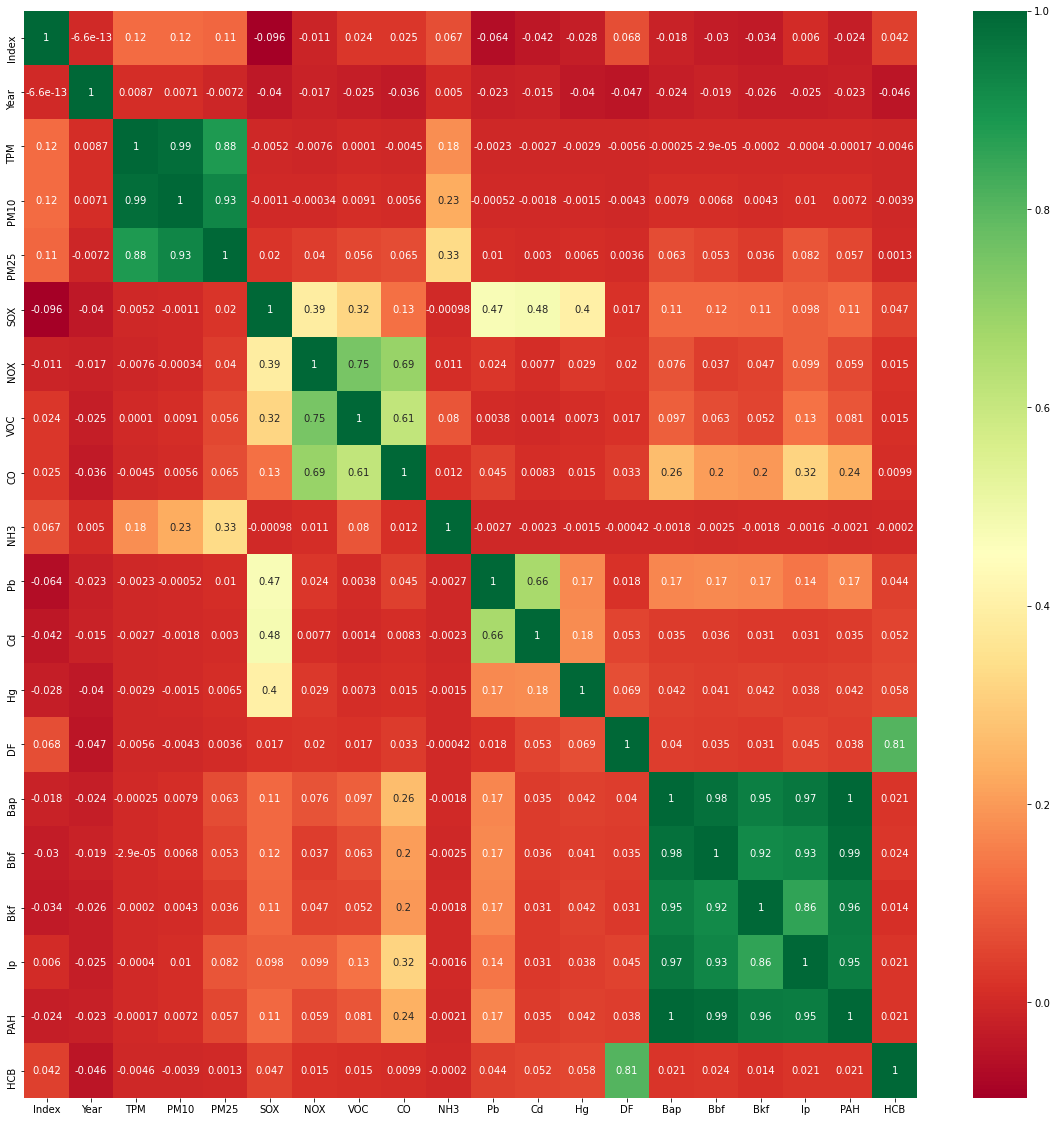

In [49]:
#Correlation Matrix with Heatmap

Xf = df3.drop('Region',axis = 1)
yf = df3.Region

#get correlations of each features in dataset
corrmat = df3.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))
#plot heat map
g = sns.heatmap(df3[top_corr_features].corr(),annot = True,cmap = "RdYlGn")


array([[<AxesSubplot:title={'center':'TPM'}>,
        <AxesSubplot:title={'center':'PM10'}>,
        <AxesSubplot:title={'center':'PM25'}>,
        <AxesSubplot:title={'center':'SOX'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'VOC'}>,
        <AxesSubplot:title={'center':'CO'}>,
        <AxesSubplot:title={'center':'NH3'}>],
       [<AxesSubplot:title={'center':'Pb'}>,
        <AxesSubplot:title={'center':'Cd'}>,
        <AxesSubplot:title={'center':'Hg'}>,
        <AxesSubplot:title={'center':'DF'}>],
       [<AxesSubplot:title={'center':'Bap'}>,
        <AxesSubplot:title={'center':'Bbf'}>,
        <AxesSubplot:title={'center':'Bkf'}>,
        <AxesSubplot:title={'center':'Ip'}>],
       [<AxesSubplot:title={'center':'PAH'}>,
        <AxesSubplot:title={'center':'HCB'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

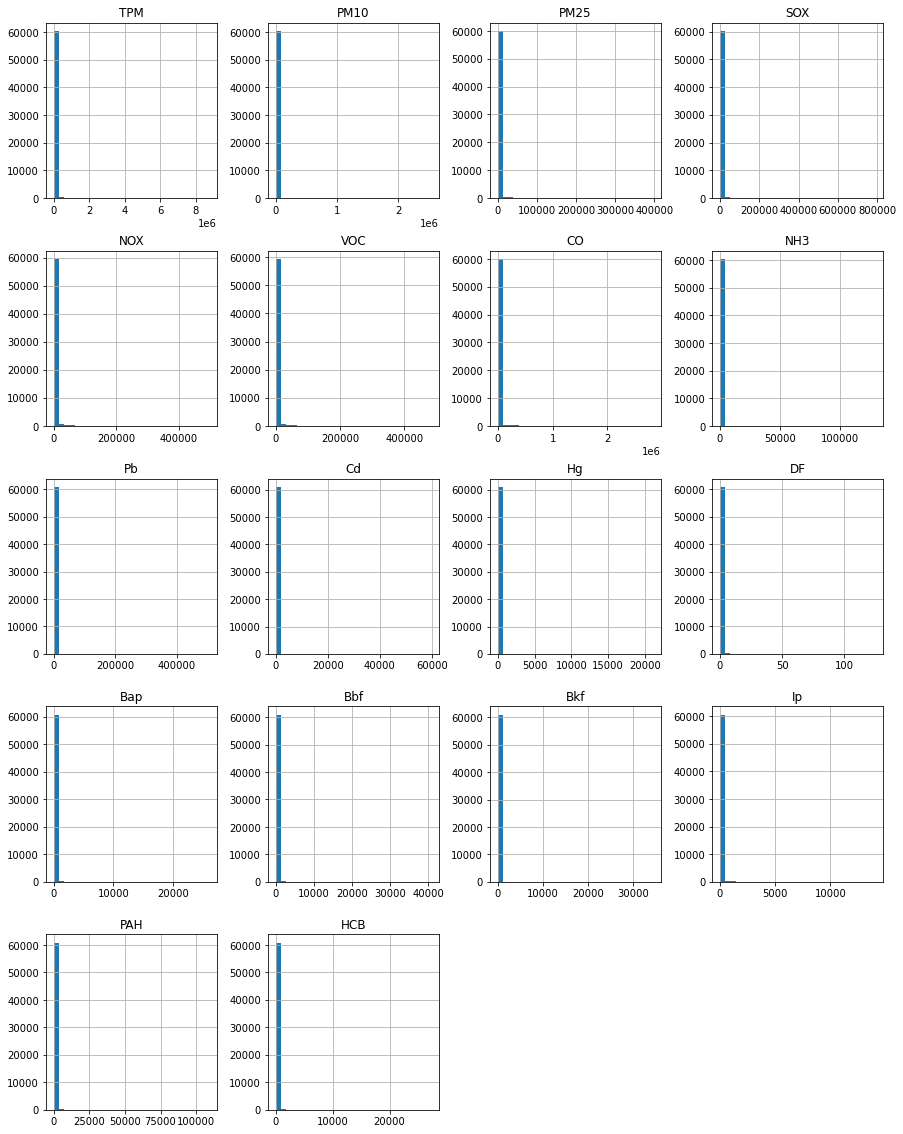

In [50]:
df_test = df3.drop(['Index', 'Year'], axis = 1)
df_test.hist(bins = 30, figsize = (15, 20))

In [51]:
df3.head()

,Source,Index,Region,Sector,Subsector,total,Year,TPM,PM10,PM25,...,Pb,Cd,Hg,DF,Bap,Bbf,Bkf,Ip,PAH,HCB
0,Ore and Mineral Industries,1,AB,Unspecified,No Subsector,y,1990,27838,8172,2875,...,416,6,93,0,0,1,1,0,3,0
1,Ore and Mineral Industries,1,BC,Unspecified,No Subsector,y,1990,24264,11297,6158,...,58,2,3085,0,9,13,12,5,39,0
3,Ore and Mineral Industries,1,MB,Unspecified,No Subsector,y,1990,10781,6531,3287,...,29,1,19960,0,0,0,0,0,0,0
4,Ore and Mineral Industries,1,NB,Unspecified,No Subsector,y,1990,4857,1529,651,...,18,1,122,0,0,0,0,0,1,0
5,Ore and Mineral Industries,1,NL,Unspecified,No Subsector,y,1990,26990,3671,1495,...,46,0,63,0,0,0,0,0,0,0


In [52]:
#30% of the feature: "Years" for test set begins from 2011 to 2019

In [53]:
a = sum(df3.Year == 2019)
a

2041

In [54]:
b = sum(df3.Year == 2018)
b

2041

In [55]:
c = sum(df3.Year == 2017)
c

2041

In [56]:
d = sum(df3.Year == 2016)
d

2041

In [57]:
e = sum(df3.Year == 2015)
e

2041

In [58]:
f = sum(df3.Year == 2014)
f

2041

In [59]:
g = sum(df3.Year == 2013)
g

2041

In [60]:
h = sum(df3.Year == 2012)
h

2041

In [61]:
i = sum(df3.Year == 2011)
i

2041

In [62]:
test_rows = (a+b+c+d+e+f+g+h+i)
test_rows

18369

In [63]:
t = 61620
yrcount = t - test_rows
yrcount

43251

In [64]:
test_index = test_rows / t
test_index

0.2981012658227848

In [65]:
train_index = 1 - test_index
train_index

0.7018987341772152

In [66]:
sorted_df = df3.sort_values(by = 'Year')
sorted_df.tail()

,Source,Index,Region,Sector,Subsector,total,Year,TPM,PM10,PM25,...,Pb,Cd,Hg,DF,Bap,Bbf,Bkf,Ip,PAH,HCB
11758,Ore and Mineral Industries,28,SK,Mining and Rock Quarrying,No Subsector,y,2019,7738,3550,1786,...,0,0,0,0,0,0,0,0,0,0
11757,Ore and Mineral Industries,28,QC,Mining and Rock Quarrying,No Subsector,y,2019,1794,935,367,...,97,3,0,0,0,0,0,0,0,0
11756,Ore and Mineral Industries,28,PE,Mining and Rock Quarrying,No Subsector,y,2019,10,5,1,...,0,0,0,0,0,0,0,0,0,0
13013,Ore and Mineral Industries,31,NT,Mining and Rock Quarrying,Potash,n,2019,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65939,Fires,157,YT,Structural Fires,Structural Fires,n,2019,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [67]:
#Dataframe will be used later to answer research questions. 
df_ans = sorted_df

In [68]:
df_ans.head()

,Source,Index,Region,Sector,Subsector,total,Year,TPM,PM10,PM25,...,Pb,Cd,Hg,DF,Bap,Bbf,Bkf,Ip,PAH,HCB
0,Ore and Mineral Industries,1,AB,Unspecified,No Subsector,y,1990,27838,8172,2875,...,416,6,93,0,0,1,1,0,3,0
53347,Commercial/Residential/Institutional,128,NT,Residential Fuel Combustion,Residential Fuel Combustion,n,1990,10,6,5,...,2,2,0,0,0,0,0,0,0,0
53346,Commercial/Residential/Institutional,128,NS,Residential Fuel Combustion,Residential Fuel Combustion,n,1990,411,192,132,...,56,33,2,0,0,0,0,0,1,1
53345,Commercial/Residential/Institutional,128,NL,Residential Fuel Combustion,Residential Fuel Combustion,n,1990,56,30,23,...,17,10,0,0,0,0,0,0,0,0
53344,Commercial/Residential/Institutional,128,NB,Residential Fuel Combustion,Residential Fuel Combustion,n,1990,127,73,44,...,25,16,0,0,0,0,0,0,0,0


In [69]:
sorted_df.isna().sum()

Source       0
Index        0
Region       0
Sector       0
Subsector    0
total        0
Year         0
TPM          0
PM10         0
PM25         0
SOX          0
NOX          0
VOC          0
CO           0
NH3          0
Pb           0
Cd           0
Hg           0
DF           0
Bap          0
Bbf          0
Bkf          0
Ip           0
PAH          0
HCB          0
dtype: int64

In [70]:
ds = {'Transportation and Mobile Equipment': 0, 'Paints and Solvents': 1, 'Ore and Mineral Industries': 2, 
      'Oil and Gas Industry': 3, 'Manufacturing': 4, 'Incineration and Waste': 5, 'Fires': 6, 
     'Electric Power Generation (Utilities)': 7, 'Dust': 8, 'Commercial/Residential/Institutional': 9, 
     'Agriculture': 10}
sorted_df['Source'] = sorted_df['Source'].map(ds)

In [70]:
dr = {'AB': 1, 'BC': 2, 'MB': 3, 'NB': 4, 'NL': 5, 'NS': 6, 'NT': 7, 'NU': 8, 'ON': 9, 
      'PE': 10, 'QC': 11, 'SK': 12, 'YT': 13} 
sorted_df['Region'] = sorted_df['Region'].map(dr)
dsec = {'Unspecified': 0, 'Upstream Oil and Gas Industry': 1, 'Mining and Rock Quarrying': 2, 
        'Chemicals Industry': 3, 'Crop Production': 4, 'Downstream Oil and Gas Industry': 5, 
        'Waste Treatment and Disposal': 6, 'Iron and Steel Industry': 7, 'Waste Incineration': 8, 
        'Cement and Concrete Industry': 9, 'Mineral Products Industry': 10, 'Non-Ferrous Refining and Smelting Industry': 11, 
        'Foundries': 12, 'Aluminium Industry': 13, 'Wood Products': 14, 'Pulp and Paper Industry': 15, 
        'Iron Ore Industry': 16, 'Grain Industry': 17, 'Construction Fuel Combustion': 18, 'Human': 19, 
        'Home Firewood Burning': 20, 'Commercial and Institutional Fuel Combustion': 21, 'Commercial Cooking': 22, 
        'Fuel Use': 23, 'Prescribed Burning': 24, 'Animal Production': 25, 'Tire Wear and Brake Lining': 26, 
        'Rail Transportation': 27, 'Marine Cargo Handling': 28, 'Crematoriums': 29, 'Residential Fuel Combustion': 30, 
        'Service Stations': 31, 'Other (Miscellaneous)': 32, 'Off-Road Diesel Vehicles and Equipment': 33, 
        'Dry Cleaning': 34, 'General Solvent Use': 35, 'Printing': 36, 'Surface Coatings': 37, 'Coal Transportation': 38, 
        'Construction Operations': 39, 'Mine Tailings': 40, 'Paved Roads': 41, 'Unpaved Roads': 42, 
        'Off-Road Gasoline/LPG/NG Vehicles and Equipment': 43, 'Light-Duty Diesel Vehicles': 44, 'Motorcycles': 45, 
        'Metal Fabrication': 46, 'Asphalt Paving Industry': 47, 'Coal': 48, 'Diesel': 49, 'Natural Gas': 50, 
        'Waste Materials': 51, 'Other (Electric Power Generation)': 52, 'Abrasives Manufacturing': 53, 
        'Bakeries': 54, 'Biofuel Production': 55, 'Electronics': 56, 'Food Preparation': 57, 'Glass Manufacturing': 58, 
        'Plastics Manufacturing': 59, 'Domestic Marine Navigation, Fishing and Military': 60, 'Textiles': 61, 
        'Vehicle Manufacturing (Engines, Parts, Assembly, Painting)': 62, 'Other (Manufacturing)': 63, 
        'Air Transportation (LTO)': 64, 'Heavy-Duty Diesel Vehicles': 65, 'Heavy-Duty Gasoline Vehicles': 66, 
        'Heavy-Duty LPG/NG Vehicles': 67, 'Light-Duty Diesel Trucks': 68, 'Light-Duty Gasoline Trucks': 69, 
        'Light-Duty Gasoline Vehicles': 70, 'Light-Duty LPG/NG Trucks': 71, 'Light-Duty LPG/NG Vehicles': 72, 
        'Structural Fires': 73}
sorted_df['Sector'] = sorted_df['Sector'].map(dsec)
dsub = {'No Subsector': 0, 'Abrasives Manufacturing': 1, 'Accidents and Equipment Failures': 2, 
        'Air Transportation (LTO)': 3, 'Alumina (Bauxite Refining)': 4, 'Animal Production': 5, 
        'Asphalt Paving Industry': 6, 'Bakeries': 7, 'Biofuel Production': 8, 'Biological Treatment of Waste': 9, 
        'Brick Products': 10, 'Cement Manufacturing': 11, 'Chemical Manufacturing': 12, 'Clay Products': 13, 
        'Cleaning Compound Manufacturing': 14, 'Coal': 15, 'Coal Mining Industry': 16, 'Coal Transportation': 17, 
        'Commercial Cooking': 18, 'Commercial and Institutional Fuel Combustion': 19, 'Concrete Batching and Products': 20, 
        'Construction Fuel Combustion': 21, 'Construction Operations': 22, 'Converted Paper Product Manufacturing': 23, 
        'Crematoriums': 24, 'Die Casting': 25, 'Diesel': 26, 'Disposal and Waste Treatment': 27, 
        'Domestic Marine Navigation, Fishing and Military': 28, 'Dry Cleaning': 29, 'Electronics': 30, 
        'Ferrous Foundries': 31, 'Fertilizer Production': 32, 'Food Preparation': 33, 'Fuel Use': 34, 
        'General Solvent Use': 35, 'Glass Manufacturing': 36, 'Grain Processing': 37, 'Gypsum Product Manufacturing': 38, 
        'Harvesting': 39, 'Heavy Crude Oil Cold Production': 40, 'Heavy-Duty Diesel Vehicles': 41, 
        'Heavy-Duty Gasoline Vehicles': 42, 'Heavy-Duty LPG/NG Vehicles': 43, 'Home Firewood Burning': 44, 
        'Human': 45, 'Inorganic Fertilizer Application': 46, 'Iron Ore Mining': 47, 'Landfills': 48, 
        'Light-Duty Diesel Trucks': 49, 'Light-Duty Diesel Vehicles': 50, 'Light-Duty Gasoline Trucks': 51, 
        'Light-Duty Gasoline Vehicles': 52, 'Light-Duty LPG/NG Trucks': 53, 'Light-Duty LPG/NG Vehicles': 54, 
        'Light/Medium Crude Oil Production': 55, 'Lime Manufacturing': 56, 'Limestone': 57, 'Marine Cargo Handling': 58, 
        'Metal Fabrication': 59, 'Metal Mining': 60, 'Mine Tailings': 61, 'Motorcycles': 62, 'Municipal Incineration': 63, 
        'Municipal Water and Wastewater Treatment': 64, 'Natural Gas': 65, 'Natural Gas Distribution': 66, 
        'Natural Gas Production and Processing': 67, 'Natural Gas Transmission and Storage': 68, 'Non-ferrous Foundries': 69, 
        'Off-Road Diesel Vehicles and Equipment': 70, 'Off-Road Gasoline/LPG/NG Vehicles and Equipment': 71, 
        'Oil Sands In-Situ Extraction': 72, 'Oil Sands Mining, Extraction and Upgrading': 73, 'Other (Chemical Industry)': 74, 
        'Other (Downstream Oil and Gas Industry)': 75, 'Other (Electric Power Generation)': 76, 
        'Other (Iron and Steel Industry)': 77, 'Other (Manufacturing)': 78, 'Other (Mineral Products Industry)': 79, 
        'Other (Mining and Rock Quarrying)': 80, 'Other (Miscellaneous)': 81, 
        'Other (Non-Ferrous Refining and Smelting Industry)': 82, 'Other (Waste Incineration)': 83, 'Other (Wood Products)': 84, 
        'Paint and Varnish Manufacturing': 85, 'Panel Board Mills': 86, 'Paved Roads': 87, 'Pelletizing': 88, 
        'Petrochemical Industry': 89, 'Petroleum Liquids Storage': 90, 'Petroleum Liquids Transportation': 91, 
        'Petroleum Refining': 92, 'Plastics Manufacturing': 93, 'Plastics and Synthetic Resins Fabrication': 94, 
        'Potash': 95, 'Prescribed Burning': 96, 'Primary (Blast Furnace and DRI)': 97, 
        'Primary Aluminium Smelting and Refining': 98, 'Primary Ni, Cu, Zn, Pb': 99, 'Printing': 100, 
        'Pulp and Paper Product Manufacturing': 101, 'Rail Transportation': 102, 'Refined Petroleum Product Pipelines': 103, 
        'Refined Petroleum Products Bulk Storage and Distribution': 104, 'Residential Fuel Combustion': 105, 
        'Residential Waste Burning': 106, 'Rock, Sand and Gravel': 107, 'Sawmills': 108, 
        'Secondary (Electric Arc Furnaces)': 109, 'Secondary Aluminium Production (Includes Recycling)': 110, 
        'Secondary Pb, Cu': 111, 'Service Stations': 112, 'Sewage Sludge Application': 113, 
        'Sewage Sludge Incineration': 114, 'Silica Production': 115, 'Specialized waste treatment and remediation': 116, 
        'Steel Recycling': 117, 'Structural Fires': 118, 'Surface Coatings': 119, 'Textiles': 120, 
        'Tillage Practices': 121, 'Tire Wear and Brake Lining': 122, 'Unpaved Roads': 123, 
        'Vehicle Manufacturing (Engines, Parts, Assembly, Painting)': 124, 'Warehousing and Storage': 125, 
        'Waste Materials': 126, 'Waste Sorting and Transfer': 127, 'Well Drilling/Servicing/Testing': 128, 
        'Wind Erosion': 129}
sorted_df['Subsector'] = sorted_df['Subsector'].map(dsub)
dt = {'n': 0, 'y': 1}
sorted_df['total'] = sorted_df['total'].map(dt)

In [71]:
#Data Mining Techniques

In [72]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from collections import Counter

In [73]:
X = sorted_df[['Index', 'Region', 'Sector', 'Subsector', 'total', 'Year', 'TPM', 'PM10', 'PM25', 'SOX', 'NOX', 'VOC', 
               'CO', 'NH3', 'Pb', 'Cd', 'Hg', 'DF', 'Bap', 'Bbf', 'Bkf', 'Ip', 'PAH', 'HCB']]
y = sorted_df['Source']

In [74]:
X.shape

(61230, 24)

In [75]:
X.head()

,Index,Region,Sector,Subsector,total,Year,TPM,PM10,PM25,SOX,...,Pb,Cd,Hg,DF,Bap,Bbf,Bkf,Ip,PAH,HCB
0,1,1,0,0,1,1990,27838,8172,2875,4779,...,416,6,93,0,0,1,1,0,3,0
53347,128,7,30,105,0,1990,10,6,5,467,...,2,2,0,0,0,0,0,0,0,0
53346,128,6,30,105,0,1990,411,192,132,5201,...,56,33,2,0,0,0,0,0,1,1
53345,128,5,30,105,0,1990,56,30,23,546,...,17,10,0,0,0,0,0,0,0,0
53344,128,4,30,105,0,1990,127,73,44,1529,...,25,16,0,0,0,0,0,0,0,0


In [76]:
y.shape

(61230,)

In [77]:
y.head()

0                  Ore and Mineral Industries
53347    Commercial/Residential/Institutional
53346    Commercial/Residential/Institutional
53345    Commercial/Residential/Institutional
53344    Commercial/Residential/Institutional
Name: Source, dtype: object

In [78]:
from sklearn.model_selection import train_test_split

X_train = X[0:43251]
X_test = X[43251:]
y_train = y[0:43251]
y_test = y[43251:]


In [79]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70638, shuffle = False, random_state = 1)

In [80]:
X_train.shape

(43251, 24)

In [123]:
X_train.describe()

,Index,Region,Sector,Subsector,total,Year,TPM,PM10,PM25,SOX,...,Pb,Cd,Hg,DF,Bap,Bbf,Bkf,Ip,PAH,HCB
count,43251.000000,43251.000000,43251.000000,43251.000000,43251.000000,43251.000000,4.325100e+04,4.325100e+04,43251.000000,43251.000000,...,43251.000000,43251.000000,43251.000000,43251.000000,43251.000000,43251.000000,43251.000000,43251.000000,43251.000000,43251.000000
mean,78.959585,6.999006,20.308848,53.436314,0.177892,2000.099188,2.279129e+04,7.426394e+03,1717.335507,2938.259069,...,586.537167,46.198585,18.260919,0.234168,47.369171,70.775543,34.935886,35.785855,188.736191,57.860304
std,45.304107,3.742006,21.445928,41.940365,0.382426,6.117037,2.279960e+05,7.202669e+04,14074.087419,24643.232882,...,9487.901189,973.065402,320.276665,2.894964,671.768981,1161.967063,684.006805,425.346272,2881.281165,825.173774
min,1.000000,1.000000,0.000000,0.000000,0.000000,1990.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,4.000000,4.000000,12.000000,0.000000,1995.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,79.000000,7.000000,11.000000,51.000000,0.000000,2000.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,118.000000,10.000000,34.000000,90.000000,0.000000,2005.000000,2.500000e+02,1.690000e+02,106.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,157.000000,13.000000,73.000000,129.000000,1.000000,2011.000000,7.486509e+06,2.184546e+06,388932.000000,791299.000000,...,504124.000000,59725.000000,21160.000000,125.000000,26073.000000,40724.000000,34516.000000,14065.000000,109171.000000,27338.000000


In [81]:
X_test.shape

(17979, 24)

In [82]:
y_train.shape

(43251,)

In [83]:
y_test.shape

(17979,)

In [84]:
print(f'Training target statistics: {Counter(y_train)}')
print(f'Testing target statistics: {Counter(y_test)}')

Training target statistics: Counter({'Ore and Mineral Industries': 10773, 'Manufacturing': 8255, 'Oil and Gas Industry': 5230, 'Transportation and Mobile Equipment': 4680, 'Incineration and Waste': 3568, 'Commercial/Residential/Institutional': 2741, 'Agriculture': 2517, 'Dust': 1652, 'Electric Power Generation (Utilities)': 1638, 'Paints and Solvents': 1378, 'Fires': 819})
Testing target statistics: Counter({'Ore and Mineral Industries': 4437, 'Manufacturing': 3445, 'Oil and Gas Industry': 2180, 'Transportation and Mobile Equipment': 1950, 'Incineration and Waste': 1502, 'Commercial/Residential/Institutional': 1159, 'Agriculture': 993, 'Electric Power Generation (Utilities)': 702, 'Dust': 688, 'Paints and Solvents': 572, 'Fires': 351})


In [85]:
clf_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 3, min_samples_leaf = 5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=0)

In [86]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array(['Incineration and Waste', 'Incineration and Waste',
       'Incineration and Waste', ..., 'Ore and Mineral Industries',
       'Ore and Mineral Industries', 'Incineration and Waste'],
      dtype=object)

In [87]:
df_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_en})
df_rf.head()

,Actual,Predicted
56154,Incineration and Waste,Incineration and Waste
56155,Incineration and Waste,Incineration and Waste
56157,Incineration and Waste,Incineration and Waste
1560,Ore and Mineral Industries,Ore and Mineral Industries
1559,Ore and Mineral Industries,Ore and Mineral Industries


In [88]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [89]:
#1. Decision Tree Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from numpy import argmax

In [90]:
def build_and_test(X_tr, X_te, y_tr, y_te, class_weight = None, threshold = False):   
   
    # Build and fit the model
    if class_weight:
        model = DecisionTreeClassifier(class_weight = class_weight)
    else:
        model = DecisionTreeClassifier()
    model.fit(X_tr, y_tr)
    
    # Test the model
    y_pred = model.predict(X_te)
    print('Precision score %s' % precision_score(y_te, y_pred, average = None))
    print('Recall score %s' % recall_score(y_te, y_pred, average = None))
    print('F1-score score %s' % f1_score(y_te, y_pred, average = None))
    print('Accuracy score %s' % accuracy_score(y_te, y_pred))
    
    y_score = model.predict_proba(X_te)
   
    # Plot metrics 
    plot_roc(y_te, y_score)
    plt.legend(bbox_to_anchor = (1.03, 1), loc = 'upper left')
    plt.xticks(rotation = 90)
    plt.show()
    
    plot_precision_recall(y_te, y_score)
    plt.legend(bbox_to_anchor = (1.03, 1), loc = 'upper left')
    plt.xticks(rotation = 90)
    plt.show()
    
    # Print a classification report
    print(classification_report(y_te,y_pred))


Precision score [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Recall score [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
F1-score score [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy score 1.0


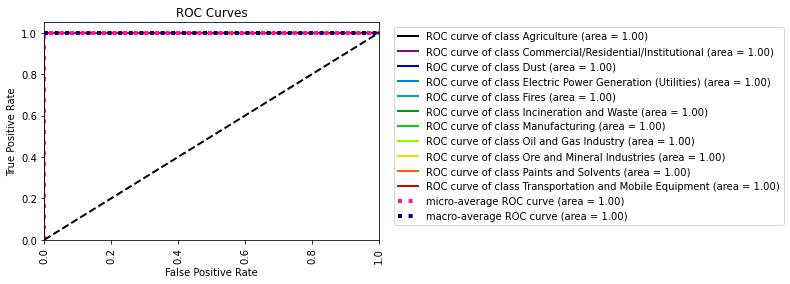

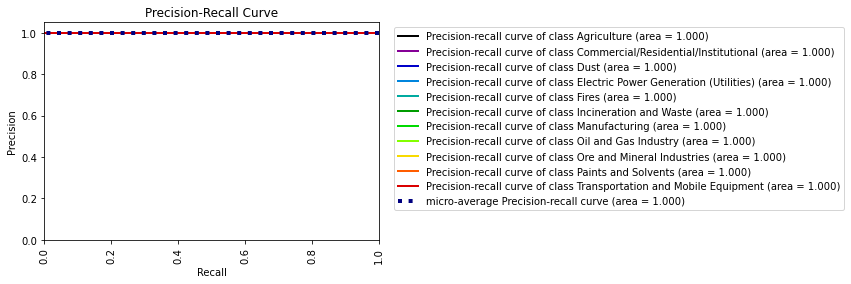

                                       precision    recall  f1-score   support

                          Agriculture       1.00      1.00      1.00       993
 Commercial/Residential/Institutional       1.00      1.00      1.00      1159
                                 Dust       1.00      1.00      1.00       688
Electric Power Generation (Utilities)       1.00      1.00      1.00       702
                                Fires       1.00      1.00      1.00       351
               Incineration and Waste       1.00      1.00      1.00      1502
                        Manufacturing       1.00      1.00      1.00      3445
                 Oil and Gas Industry       1.00      1.00      1.00      2180
           Ore and Mineral Industries       1.00      1.00      1.00      4437
                  Paints and Solvents       1.00      1.00      1.00       572
  Transportation and Mobile Equipment       1.00      1.00      1.00      1950

                             accuracy             

In [91]:
build_and_test(X_train, X_test, y_train, y_test)

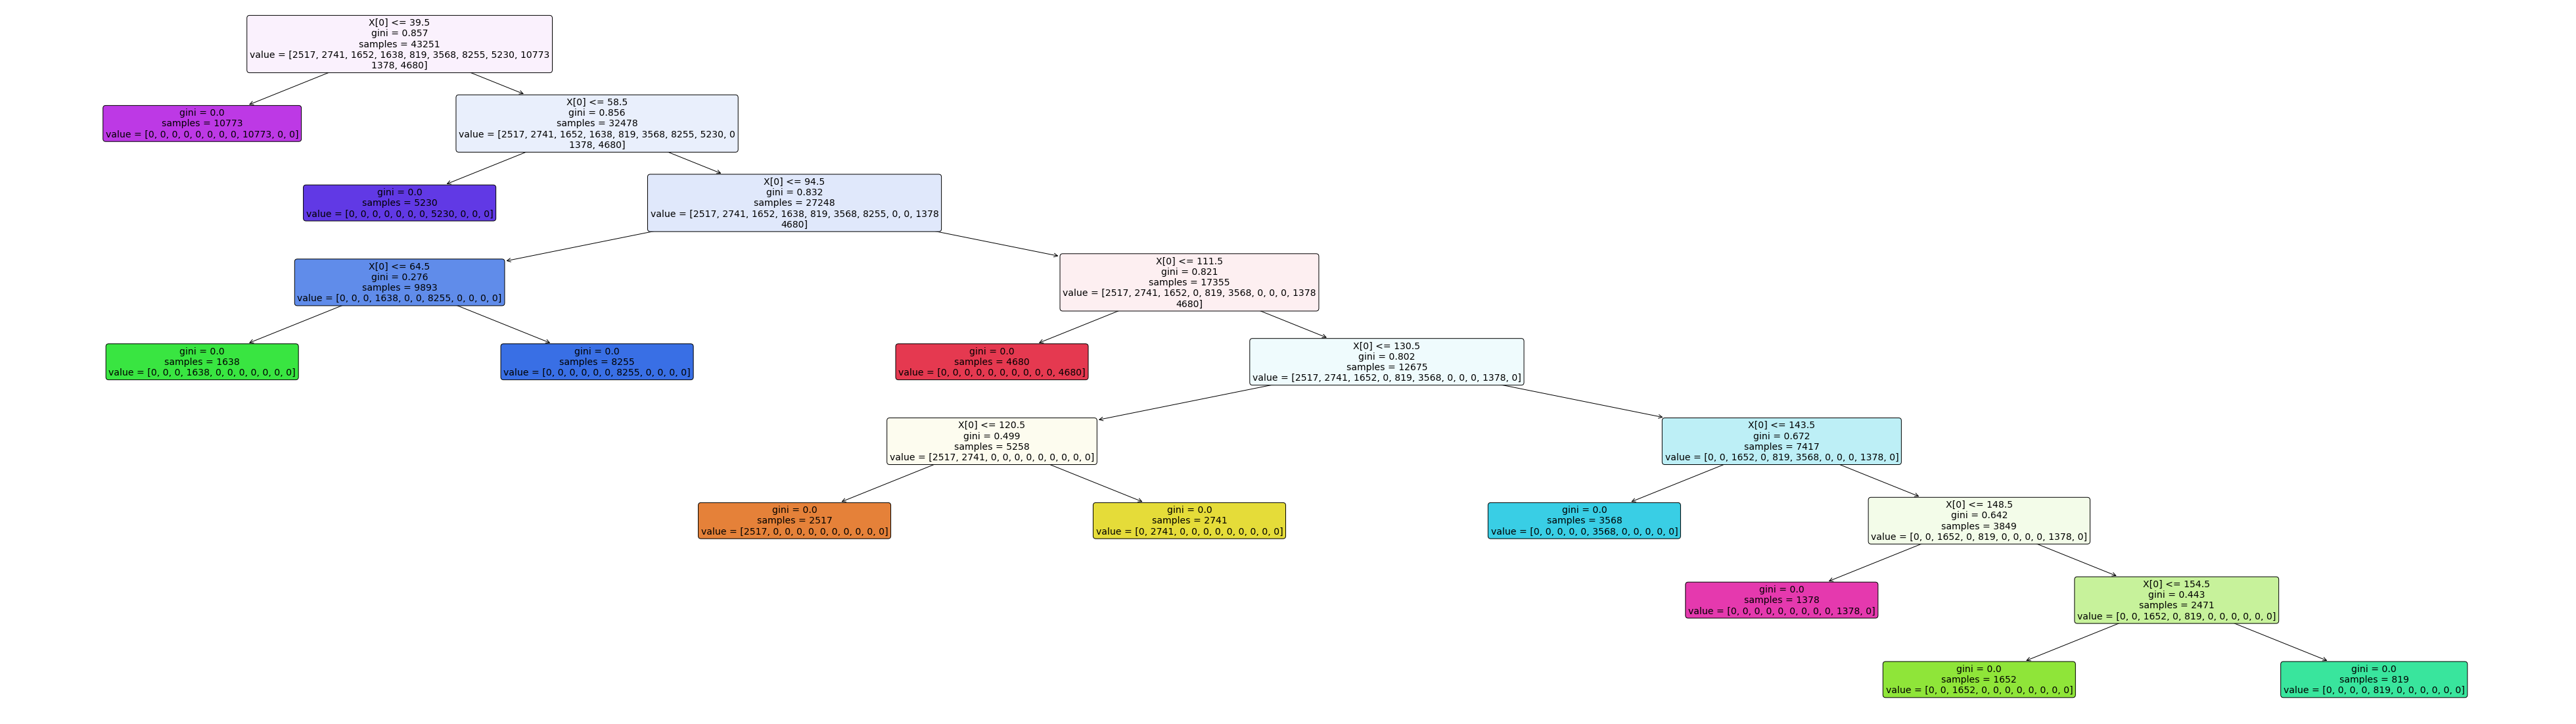

In [92]:
from sklearn.tree import plot_tree

clf_d = DecisionTreeClassifier(max_depth=10, random_state = 0) #max_depth is maximum number of levels in the tree
model_d = clf_d.fit(X_train, y_train)

plt.figure(figsize = (70,20))
a = plot_tree(model_d, 
              filled = True, 
              rounded = True, 
              fontsize = 14)

#0 denotes that all elements belong to a certain class or if there exists only one class, and
#1 denotes that the elements are randomly distributed across various classes.
#0.5 denotes equally distributed elements into some classes.


In [93]:
Xfsd = sorted_df[['Year', 'TPM', 'PM10', 'PM25', 'SOX', 'NOX', 'VOC', 'CO', 'NH3', 'Pb', 'Cd',
                    'Hg','DF', 'Bap', 'Bbf', 'Bkf', 'Ip', 'PAH', 'HCB']] 
yfsd = sorted_df['Source']

model_d = clf_d.fit(Xfsd, yfsd)

<AxesSubplot:>

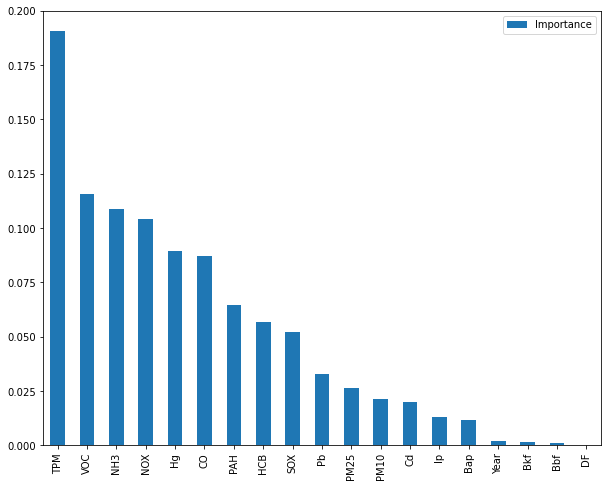

In [94]:
feat_importances_d = pd.DataFrame(model_d.feature_importances_, index = Xfsd.columns, columns = ["Importance"])
feat_importances_d.sort_values(by = 'Importance', ascending = False, inplace = True)
feat_importances_d.plot(kind = 'bar', figsize = (10, 8))

<AxesSubplot:>

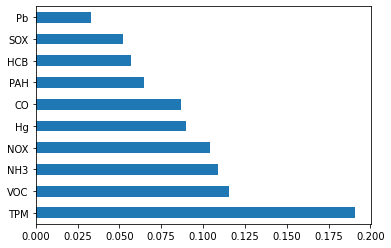

In [95]:
feat_importances_d = pd.Series(model_d.feature_importances_, index = Xfsd.columns)
feat_importances_d.nlargest(10).plot(kind = 'barh')

In [96]:
from sklearn.metrics import confusion_matrix
cm_d = confusion_matrix(y_test, y_pred_en,)
cm_d

array([[   0,  993,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1159,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,  688,    0,    0,    0,    0,    0],
       [   0,    0,    0,  702,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,  351,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1502,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 3445,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 2180,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 4437,    0,    0],
       [   0,    0,    0,    0,    0,  572,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1950]],
      dtype=int64)

In [97]:
#2. Random Forest Classifier

from sklearn.model_selection import train_test_split
Xr_train = X[0:43251]
Xr_test = X[43251:]
yr_train = y[0:43251]
yr_test = y[43251:]
#according to Source

In [98]:
#Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, train_size = 0.7, shuffle = False, random_state = 1)

In [99]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion = 'gini', n_estimators = 5, random_state = 0)

In [100]:
forest.fit(Xr_train, yr_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [101]:
y_pred_rf = forest.predict(X_test)
y_pred_rf

array(['Incineration and Waste', 'Incineration and Waste',
       'Incineration and Waste', ..., 'Ore and Mineral Industries',
       'Ore and Mineral Industries', 'Fires'], dtype=object)

In [102]:
df_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
df_rf.head()

,Actual,Predicted
56154,Incineration and Waste,Incineration and Waste
56155,Incineration and Waste,Incineration and Waste
56157,Incineration and Waste,Incineration and Waste
1560,Ore and Mineral Industries,Ore and Mineral Industries
1559,Ore and Mineral Industries,Ore and Mineral Industries


In [103]:
from sklearn import metrics
yr_pred_rf = forest.predict(Xr_test)
print("Accuracy:", metrics.accuracy_score(yr_test, yr_pred_rf)*100)

Accuracy: 95.45024751098504


In [104]:
clf_r = RandomForestClassifier(n_estimators = 5, random_state = 0)

Xrf = sorted_df[['Year', 'TPM', 'PM10', 'PM25', 'SOX', 'NOX', 'VOC', 'CO', 'NH3', 'Pb', 'Cd',
                    'Hg','DF', 'Bap', 'Bbf', 'Bkf', 'Ip', 'PAH', 'HCB']] 
yrf = sorted_df['Source']

model_r = clf_r.fit(Xrf, yrf)

<AxesSubplot:>

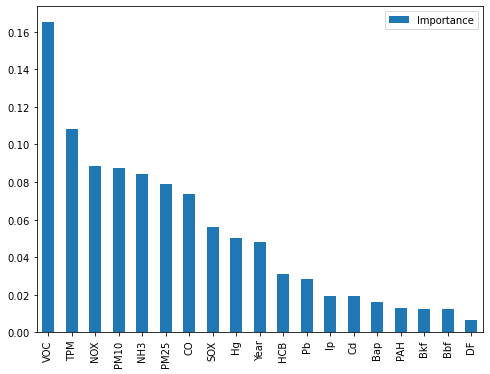

In [105]:
feat_importances_r = pd.DataFrame(model_r.feature_importances_, index = Xrf.columns, columns = ["Importance"])
feat_importances_r.sort_values(by = 'Importance', ascending = False, inplace = True)
feat_importances_r.plot(kind = 'bar', figsize = (8,6))

<AxesSubplot:>

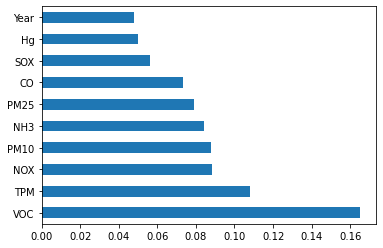

In [106]:
feat_importances_r = pd.Series(model_r.feature_importances_, index = Xrf.columns)
feat_importances_r.nlargest(10).plot(kind = 'barh')

In [107]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(yr_test, yr_pred,)
cm_rf

NameError: name 'yr_pred' is not defined

In [108]:
#Multinomial logistic Regression 

In [109]:
from sklearn import linear_model
from sklearn import metrics

Xmr_train = X[0:43251]
Xmr_test = X[43251:]
ymr_train = y[0:43251]
ymr_test = y[43251:]
#according to Source

In [110]:
#train_x, test_x, train_y, test_y = train_test_split(Xmr, ymr, train_size = 0.7)

In [111]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xmr_train = sc.fit_transform(Xmr_train)
Xmr_test = sc.transform(Xmr_test)


In [112]:
# Train multi-classification model with logistic regression
lr = linear_model.LogisticRegression()
lr.fit(Xmr_train, ymr_train)

# Train multinomial logistic regression model
mul_lr = linear_model.LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg').fit(Xmr_train, ymr_train)

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
# Predicting the Test set results
y_pred_mr = mul_lr.predict(Xmr_test)
y_pred_mr

array(['Incineration and Waste', 'Incineration and Waste',
       'Incineration and Waste', ..., 'Ore and Mineral Industries',
       'Ore and Mineral Industries', 'Fires'], dtype=object)

In [114]:
df_mr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_mr})
df_mr.head()

,Actual,Predicted
56154,Incineration and Waste,Incineration and Waste
56155,Incineration and Waste,Incineration and Waste
56157,Incineration and Waste,Incineration and Waste
1560,Ore and Mineral Industries,Ore and Mineral Industries
1559,Ore and Mineral Industries,Ore and Mineral Industries


In [115]:
cm_mr = confusion_matrix(ymr_test, y_pred_mr)
cm_mr

array([[ 865,  128,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  27, 1132,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,  686,    0,    2,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,  640,    0,    0,    0,   62,    0,    0,    0],
       [   0,    0,    0,    0,  351,    0,    0,    0,    0,    0,    0],
       [   0,   94,    0,    0,    0, 1408,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 3407,    0,    0,    0,   38],
       [   0,    0,    0,    2,    0,    0,    0, 2171,    0,    0,    7],
       [   0,    0,    0,    0,    0,    0,    0,    0, 4437,    0,    0],
       [   0,    0,  120,    0,    0,   40,    0,    0,    0,  412,    0],
       [   0,    0,    0,    0,    0,    0,   32,    0,    0,    0, 1918]],
      dtype=int64)

In [116]:
print ("Logistic regression Train Accuracy :: ", metrics.accuracy_score(ymr_train, lr.predict(Xmr_train)))
print ("Logistic regression Test Accuracy :: ", metrics.accuracy_score(ymr_test, lr.predict(Xmr_test)))

print ("Multinomial Logistic regression Train Accuracy :: ", metrics.accuracy_score(ymr_train, mul_lr.predict(Xmr_train)))
print ("Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(ymr_test, mul_lr.predict(Xmr_test)))


Logistic regression Train Accuracy ::  0.9689718156805623
Logistic regression Test Accuracy ::  0.9681851048445409
Multinomial Logistic regression Train Accuracy ::  0.9702434625788999
Multinomial Logistic regression Test Accuracy ::  0.9692975137660604


In [117]:
#1. Which of the provinces display an upward trend of air pollutant emissions for 2019?

In [118]:
#Using Random Forest Tree selected features, drop other features except Region and Year

df4 = df_ans.drop(['Index', 'Source', 'Sector', 'Subsector', 'total', 
                'Pb', 'Cd', 'DF', 'Bap', 'Bbf', 'Bkf', 'Ip', 'PAH', 'HCB'], axis = 1, inplace = False)

In [119]:
df4.head()

,Region,Year,TPM,PM10,PM25,SOX,NOX,VOC,CO,NH3,Hg
0,1,1990,27838,8172,2875,4779,7195,2889,3892,27,93
53347,7,1990,10,6,5,467,102,3,30,4,0
53346,6,1990,411,192,132,5201,1837,52,594,80,2
53345,5,1990,56,30,23,546,565,10,140,27,0
53344,4,1990,127,73,44,1529,884,17,198,38,0


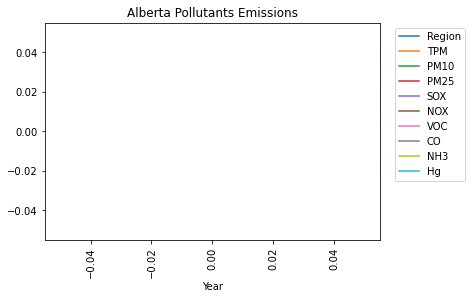

In [120]:
#Alberta shows increase in TPM and PM10 pollutants emissions.

dfab = df4[df4.Region == 'AB']
df_ab = dfab.groupby(['Year']).sum()
df_AB = pd.DataFrame(data = df_ab)
df_AB.plot.line(title = 'Alberta Pollutants Emissions')
plt.legend(bbox_to_anchor = (1.03, 1), loc = 'upper left')
plt.xticks(rotation = 90)
plt.show()

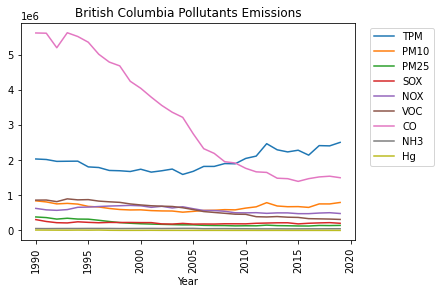

In [86]:
#British Columbia shows slight increase in TPM pollutants emissions.

dfbc = df4[df4.Region == 'BC']
df_bc = dfbc.groupby(['Year']).sum()
df_BC = pd.DataFrame(data = df_bc)
df_BC.plot.line(title = 'British Columbia Pollutants Emissions')
plt.legend(bbox_to_anchor = (1.03, 1), loc = 'upper left')
plt.xticks(rotation = 90)
plt.show()

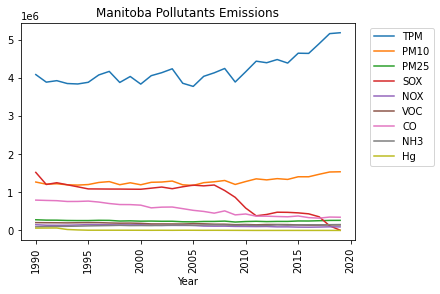

In [87]:
#Manitoba shows increase in TPM pollutants emissions.

dfmb = df4[df4.Region == 'MB']
df_mb = dfmb.groupby(['Year']).sum()
df_MB = pd.DataFrame(data = df_mb)
df_MB.plot.line(title = 'Manitoba Pollutants Emissions')
plt.legend(bbox_to_anchor = (1.03, 1), loc = 'upper left')
plt.xticks(rotation = 90)
plt.show()

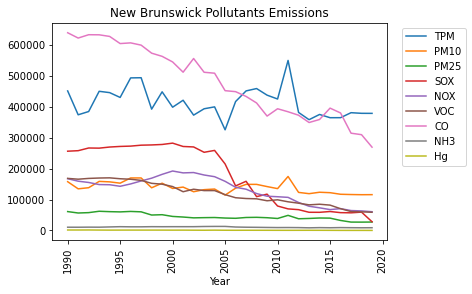

In [88]:
#New Brunswick shows decrease in all pollutants emissions.

dfnb = df4[df4.Region == 'NB']
df_nb = dfnb.groupby(['Year']).sum()
df_NB = pd.DataFrame(data = df_nb)
df_NB.plot.line(title = 'New Brunswick Pollutants Emissions')
plt.legend(bbox_to_anchor = (1.03, 1), loc = 'upper left')
plt.xticks(rotation = 90)
plt.show()

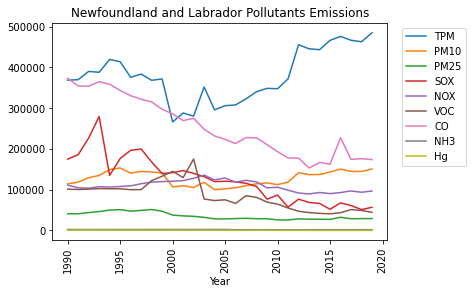

In [89]:
#Newfoundland and Labrador shows increase in TPM pollutants emissions.

dfnl = df4[df4.Region == 'NL']
df_nl = dfnl.groupby(['Year']).sum()
df_NL = pd.DataFrame(data = df_nl)
df_NL.plot.line(title = 'Newfoundland and Labrador Pollutants Emissions')
plt.legend(bbox_to_anchor = (1.03, 1), loc = 'upper left')
plt.xticks(rotation = 90)
plt.show()

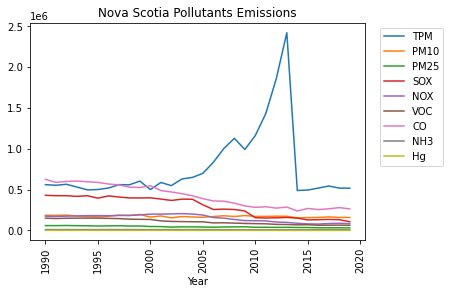

In [90]:
#Nova Scotia shows decrease in all pollutants emissions.

dfns = df4[df4.Region == 'NS']
df_ns = dfns.groupby(['Year']).sum()
df_NS = pd.DataFrame(data = df_ns)
df_NS.plot.line(title = 'Nova Scotia Pollutants Emissions')
plt.legend(bbox_to_anchor = (1.03, 1), loc = 'upper left')
plt.xticks(rotation = 90)
plt.show()

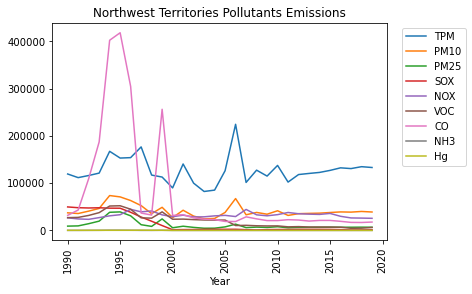

In [91]:
#Northwest Territories shows decrease in all pollutants emissions.

dfnt = df4[df4.Region == 'NT']
df_nt = dfnt.groupby(['Year']).sum()
df_NT = pd.DataFrame(data = df_nt)
df_NT.plot.line(title = 'Northwest Territories Pollutants Emissions')
plt.legend(bbox_to_anchor = (1.03, 1), loc = 'upper left')
plt.xticks(rotation = 90)
plt.show()

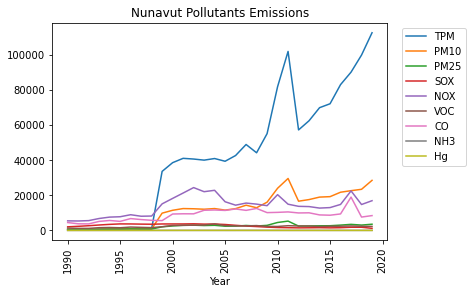

In [92]:
#Nunavut shows increase in TPM pollutants emissions.

dfnu = df4[df4.Region == 'NU']
df_nu = dfnu.groupby(['Year']).sum()
df_NU = pd.DataFrame(data = df_nu)
df_NU.plot.line(title = 'Nunavut Pollutants Emissions')
plt.legend(bbox_to_anchor = (1.03, 1), loc = 'upper left')
plt.xticks(rotation = 90)
plt.show()

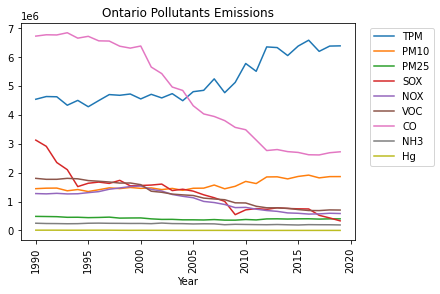

In [93]:
#Ontario shows increase in TPM pollutants emissions.

dfon = df4[df4.Region == 'ON']
df_on = dfon.groupby(['Year']).sum()
df_ON = pd.DataFrame(data = df_on)
df_ON.plot.line(title = 'Ontario Pollutants Emissions')
plt.legend(bbox_to_anchor = (1.03, 1), loc = 'upper left')
plt.xticks(rotation = 90)
plt.show()

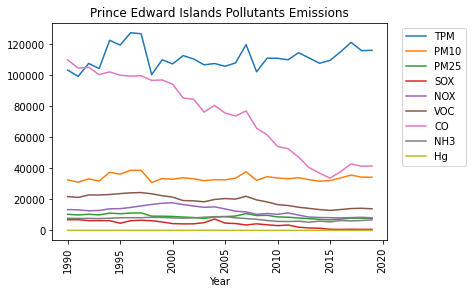

In [94]:
#Prince Edward Islands shows no change in high TPM pollutants emissions.

dfpe = df4[df4.Region == 'PE']
df_pe = dfpe.groupby(['Year']).sum()
df_PE = pd.DataFrame(data = df_pe)
df_PE.plot.line(title = 'Prince Edward Islands Pollutants Emissions')
plt.legend(bbox_to_anchor = (1.03, 1), loc = 'upper left')
plt.xticks(rotation = 90)
plt.show()

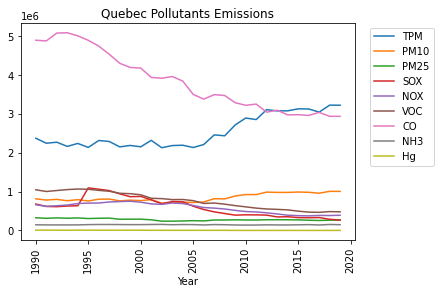

In [95]:
#Quebec shows increase in TPM pollutants emissions.

dfqc = df4[df4.Region == 'QC']
df_qc = dfqc.groupby(['Year']).sum()
df_QC = pd.DataFrame(data = df_qc)
df_QC.plot.line(title = 'Quebec Pollutants Emissions')
plt.legend(bbox_to_anchor = (1.03, 1), loc = 'upper left')
plt.xticks(rotation = 90)
plt.show()

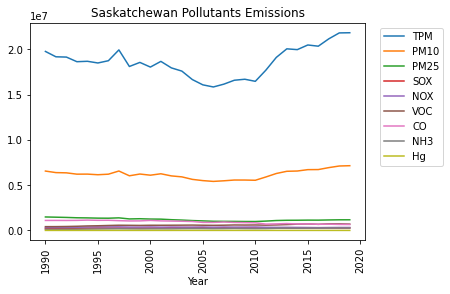

In [96]:
#Saskatchewan shows increase in TPM pollutants emissions.

dfsk = df4[df4.Region == 'SK']
df_sk = dfsk.groupby(['Year']).sum()
df_SK = pd.DataFrame(data = df_sk)
df_SK.plot.line(title = 'Saskatchewan Pollutants Emissions')
plt.legend(bbox_to_anchor = (1.03, 1), loc = 'upper left')
plt.xticks(rotation = 90)
plt.show()

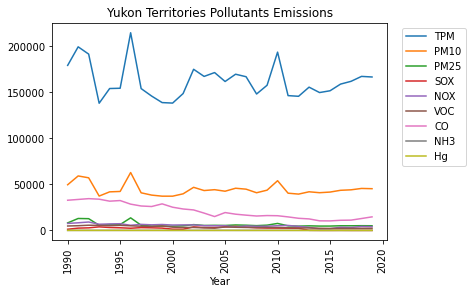

In [97]:
#Yukon Territories shows decrease in all pollutants emissions.

dfyt = df4[df4.Region == 'YT']
df_yt = dfyt.groupby(['Year']).sum()
df_YT = pd.DataFrame(data = df_yt)
df_YT.plot.line(title = 'Yukon Territories Pollutants Emissions')
plt.legend(bbox_to_anchor = (1.03, 1), loc = 'upper left')
plt.xticks(rotation = 90)
plt.show()

In [98]:
#2. Which of the sources of emissions still need some reforms for 2019?

In [114]:
df5 = df_ans.drop(['Index', 'Region', 'Sector', 'Subsector', 'total', 
                'Pb', 'Cd', 'DF', 'Bap', 'Bbf', 'Bkf', 'Ip', 'PAH', 'HCB'], axis = 1, inplace = False)

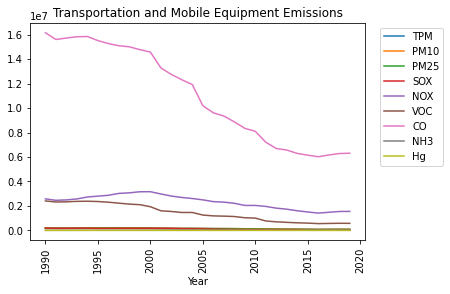

In [100]:
#No reforms needed for Transportation and Mobile Equipment

df_transportion = df5[df5.Source == 'Transportation and Mobile Equipment']
df_t = df_transportion.groupby(['Year']).sum()
df_tm = pd.DataFrame(data = df_t)
df_tm.plot.line(title = 'Transportation and Mobile Equipment Emissions')
plt.legend(bbox_to_anchor = (1.03, 1), loc = 'upper left')
plt.xticks(rotation = 90)
plt.show()

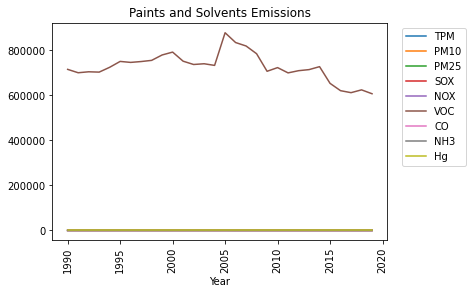

In [101]:
#No reforms needed for Paints and Solvents

df_paints = df5[df5.Source == 'Paints and Solvents']
df_p = df_paints.groupby(['Year']).sum()
df_ps = pd.DataFrame(data = df_p)
df_ps.plot.line(title = 'Paints and Solvents Emissions')
plt.legend(bbox_to_anchor = (1.03, 1), loc = 'upper left')
plt.xticks(rotation = 90)
plt.show()

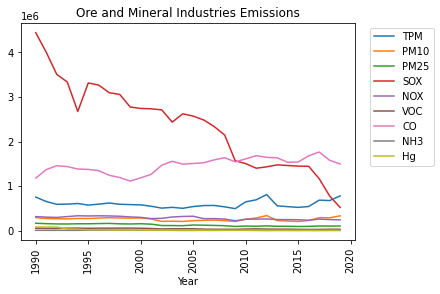

In [102]:
#No reforms needed for Ore and Mineral Industries

df_ore = df5[df5.Source == 'Ore and Mineral Industries']
df_o = df_ore.groupby(['Year']).sum()
df_om = pd.DataFrame(data = df_o)
df_om.plot.line(title = 'Ore and Mineral Industries Emissions')
plt.legend(bbox_to_anchor = (1.03, 1), loc = 'upper left')
plt.xticks(rotation = 90)
plt.show()

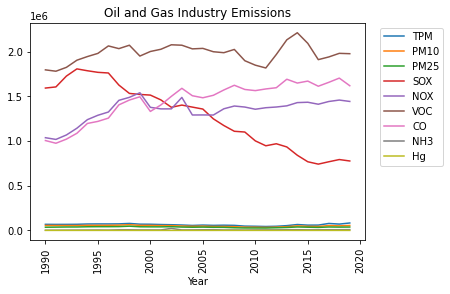

In [103]:
#Would need some reforms for Oil and Gas Industry particularly for VOC pollutants

df_oil = df5[df5.Source == 'Oil and Gas Industry']
df_og = df_oil.groupby(['Year']).sum()
df_ogi = pd.DataFrame(data = df_og)
df_ogi.plot.line(title = 'Oil and Gas Industry Emissions')
plt.legend(bbox_to_anchor = (1.03, 1), loc = 'upper left')
plt.xticks(rotation = 90)
plt.show()

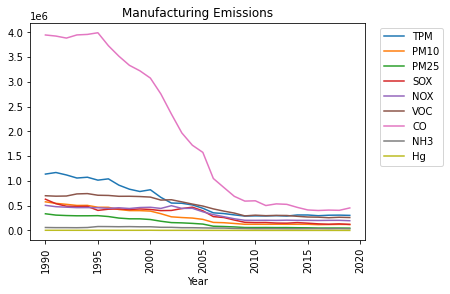

In [104]:
#No reforms needed for Manufacturing Emissions

df_manufacturing = df5[df5.Source == 'Manufacturing']
df_mf = df_manufacturing.groupby(['Year']).sum()
df_mfg = pd.DataFrame(data = df_mf)
df_mfg.plot.line(title = 'Manufacturing Emissions')
plt.legend(bbox_to_anchor = (1.03, 1), loc = 'upper left')
plt.xticks(rotation = 90)
plt.show()

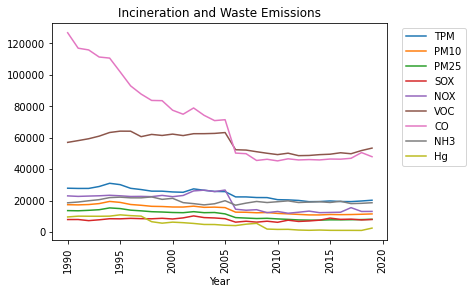

In [105]:
#No reforms needed for Incineration and Waste Emissions

df_incineration = df5[df5.Source == 'Incineration and Waste']
df_i = df_incineration.groupby(['Year']).sum()
df_iw = pd.DataFrame(data = df_i)
df_iw.plot.line(title = 'Incineration and Waste Emissions')
plt.legend(bbox_to_anchor = (1.03, 1), loc = 'upper left')
plt.xticks(rotation = 90)
plt.show()

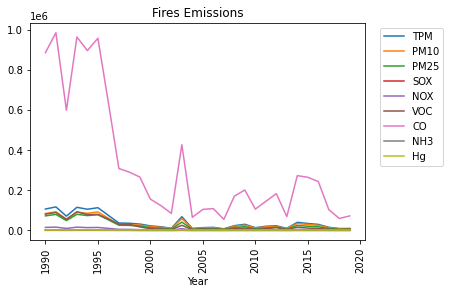

In [106]:
#No reforms needed for Fires

df_fires = df5[df5.Source == 'Fires']
df_f = df_fires.groupby(['Year']).sum()
df_fr = pd.DataFrame(data = df_f)
df_fr.plot.line(title = 'Fires Emissions')
plt.legend(bbox_to_anchor = (1.03, 1), loc = 'upper left')
plt.xticks(rotation = 90)
plt.show()

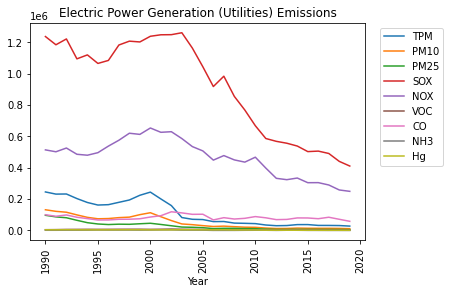

In [107]:
#No reforms needed for Electric Power Generation (Utilities)

df_electric = df5[df5.Source == 'Electric Power Generation (Utilities)']
df_e = df_electric.groupby(['Year']).sum()
df_ep = pd.DataFrame(data = df_e)
df_ep.plot.line(title = 'Electric Power Generation (Utilities) Emissions')
plt.legend(bbox_to_anchor = (1.03, 1), loc = 'upper left')
plt.xticks(rotation = 90)
plt.show()

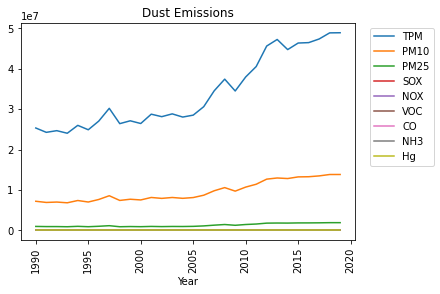

In [108]:
#Needs reforms for Dust particularly for TPM and TPM10 pollutants

df_dust = df5[df5.Source == 'Dust']
df_d = df_dust.groupby(['Year']).sum()
df_dt = pd.DataFrame(data = df_d)
df_dt.plot.line(title = 'Dust Emissions')
plt.legend(bbox_to_anchor = (1.03, 1), loc = 'upper left')
plt.xticks(rotation = 90)
plt.show()

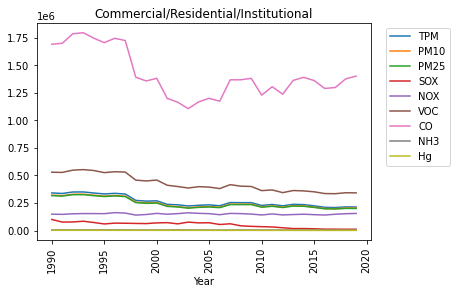

In [109]:
#Would need reforms for Commercial/Residential/Institutional particularly for CO

df_commercial = df5[df5.Source == 'Commercial/Residential/Institutional']
df_c = df_commercial.groupby(['Year']).sum()
df_cri = pd.DataFrame(data = df_c)
df_cri.plot.line(title = 'Commercial/Residential/Institutional')
plt.legend(bbox_to_anchor = (1.03, 1), loc = 'upper left')
plt.xticks(rotation = 90)
plt.show()

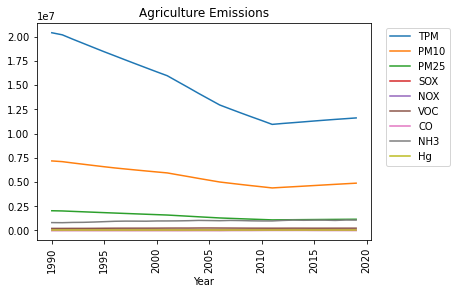

In [110]:
#No reforms needed for Agriculture

df_agriculture = df5[df5.Source == 'Agriculture']
df_a = df_agriculture.groupby(['Year']).sum()
df_ag = pd.DataFrame(data = df_a)
df_ag.plot.line(title = 'Agriculture Emissions')
plt.legend(bbox_to_anchor = (1.03, 1), loc = 'upper left')
plt.xticks(rotation = 90)
plt.show()

In [111]:
#3. What are the 3 major SOURCES of air pollutant emissions for the year 2020?

In [116]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from statistics import mean
import math

In [117]:
Xs = df5.values[43251:, 1:]
ys = df5.values[43251:, 0]

# define the multinomial logistic regression model
mul_lr = linear_model.LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs').fit(train_x, train_y)
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
# evaluate the model and collect the scores
n_scores = cross_val_score(mul_lr, Xs, ys, scoring = 'accuracy', cv = cv, n_jobs = -1)
# report the model performance 
print('Mean Accuracy: %.2f (%.2f)' % (mean(n_scores), math.sqrt(mean(n_scores))))

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mean Accuracy: 0.42 (0.65)


In [118]:
## make a prediction with a multinomial logistic regression model

Xs = df5.values[43251:, 1:]
ys = df5.values[43251:, 0]

# define dataset
Xs, ys = make_classification(n_samples=1000, n_features=9, n_informative=3, n_redundant=0, n_classes=3, random_state=1)

# use the multinomial logistic regression model:
# mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(train_x, train_y)
# fit the model on the whole dataset
mul_lr.fit(Xs, ys)


LogisticRegression(multi_class='multinomial')

In [119]:
# define a single row of input data using mean values of each feature air pollutants
row1 = [84379.95, 26902.43, 5663.52, 10932.16, 10775.76, 9748.23, 39647.74, 2677.07, 74.12]

In [120]:
# predict the class label
yhat = mul_lr.predict([row1])

In [121]:
# summarize the predicted class
print('Predicted Class: %d' % yhat[0])

Predicted Class: 0


In [122]:
# define a single row of input data using the 75% values
row2 = [1606.78, 951.23, 519.88, 811.31, 2351.78, 1518.43, 3806.23, 91.87, 13.33]

In [123]:
yhat = mul_lr.predict([row2])
print('Predicted Class: %d' % yhat[0])

Predicted Class: 0


In [124]:
# define a single row of input data using the max values
row3 = [28912967.21, 8880675.05, 1690838.10, 3004321.65, 2758843.76, 2943101.77, 11547434.59, 503518.00, 34269.09]

In [125]:
yhat = mul_lr.predict([row3])
print('Predicted Class: %d' % yhat[0])

Predicted Class: 0


In [126]:
#predict probabilities with a multinomial logistic regression model

Xs = df5.values[43251:, 1:]
ys = df5.values[43251:, 0]

# define dataset
Xs, ys = make_classification(n_samples=1000, n_features=9, n_informative=2, n_redundant=2, n_classes=2, random_state=1)

# use the multinomial logistic regression model:
# mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(train_x, train_y)
# fit the model on the whole dataset
mul_lr.fit(Xs, ys)


LogisticRegression(multi_class='multinomial')

In [127]:
# define a single row of input data using the max values
row = [28912967.21, 8880675.05, 1690838.10, 3004321.65, 2758843.76, 2943101.77, 11547434.59, 503518.00, 34269.09]

In [128]:
# predict a multinomial probability distribution
yhat = mul_lr.predict_proba([row])

# summarize the predicted probabilities
print('Predicted Probabilities: %s' % yhat[0])

Predicted Probabilities: [0. 1.]


In [108]:
#4. Which of the provinces have reduced all of the air pollutant emissions for the year 2020?

In [156]:
#Create dataframe for each provinces

prov_AB = df_ans[df_ans.Region == 'AB']
prov_BC = df_ans[df_ans.Region == 'BC']
prov_MB = df_ans[df_ans.Region == 'MB']
prov_NB = df_ans[df_ans.Region == 'NB']
prov_NL = df_ans[df_ans.Region == 'NL']
prov_NS = df_ans[df_ans.Region == 'NS']
prov_NT = df_ans[df_ans.Region == 'NT']
prov_NU = df_ans[df_ans.Region == 'NU']
prov_ON = df_ans[df_ans.Region == 'ON']
prov_PE = df_ans[df_ans.Region == 'PE']
prov_QC = df_ans[df_ans.Region == 'QC']
prov_SK = df_ans[df_ans.Region == 'SK']
prov_YT = df_ans[df_ans.Region == 'YT']

In [157]:
prov_AB.shape

(4710, 25)

In [158]:
prov_AB = prov_AB.drop(['Index', 'Region', 'Source', 'Sector', 'Subsector', 'total', 'Pb', 'Cd', 'DF', 
                        'Bap', 'Bbf', 'Bkf', 'Ip', 'PAH', 'HCB'], axis = 1)

In [159]:
prov_AB.head()

,Year,TPM,PM10,PM25,SOX,NOX,VOC,CO,NH3,Hg
0,1990,27838.0,8172.0,2875.0,4779.0,7195.0,2889.0,3892.0,27.0,93.0
53340,1990,783.0,560.0,499.0,300.0,5411.0,327.0,2399.0,31.0,16.0
12180,1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53760,1990,0.0,0.0,0.0,0.0,0.0,9475.0,0.0,0.0,0.0
11760,1990,789.0,673.0,400.0,1509.0,933.0,347.0,131.0,0.0,0.0


In [160]:
ab1 = sum(prov_AB.Year == 2019)
ab1

157

In [161]:
ab2 = sum(prov_AB.Year == 2018)
ab2

157

In [162]:
ab3 = sum(prov_AB.Year == 2017)
ab3

157

In [163]:
ab4 = sum(prov_AB.Year == 2016)
ab4

157

In [164]:
ab5 = sum(prov_AB.Year == 2015)
ab5

157

In [165]:
ab6 = sum(prov_AB.Year == 2014)
ab6

157

In [166]:
ab7 = sum(prov_AB.Year == 2013)
ab7

157

In [167]:
ab8 = sum(prov_AB.Year == 2012)
ab8

157

In [168]:
ab9 = sum(prov_AB.Year == 2011)
ab9

157

In [169]:
test_rows = (ab1+ab2+ab3+ab4+ab5+ab6+ab7+ab8+ab9)
test_rows

1413

In [170]:
t = 4710
yrcount = t - test_rows
yrcount

3297

In [171]:
test_index = test_rows / t
test_index

0.3

In [172]:
train_index = 1 - test_index
train_index

0.7

In [173]:
Xr = prov_AB.values[0:3297, 1:]
yr = prov_AB.values[0:3297, 0]
train_x, test_x, train_y, test_y = train_test_split(Xr, yr, train_size=0.7)

# Train multi-classification model with logistic regression
lr = linear_model.LogisticRegression()
lr.fit(train_x, train_y)

# Train multinomial logistic regression model
mul_lr = linear_model.LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg').fit(train_x, train_y)

print ("Logistic regression Train Accuracy :: ", metrics.accuracy_score(train_y, lr.predict(train_x)))
print ("Logistic regression Test Accuracy :: ", metrics.accuracy_score(test_y, lr.predict(test_x)))

print ("Multinomial Logistic regression Train Accuracy :: ", metrics.accuracy_score(train_y, mul_lr.predict(train_x)))
print ("Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(test_y, mul_lr.predict(test_x)))


C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic regression Train Accuracy ::  0.05201560468140442
Logistic regression Test Accuracy ::  0.047474747474747475
Multinomial Logistic regression Train Accuracy ::  0.05721716514954486
Multinomial Logistic regression Test Accuracy ::  0.049494949494949494


C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [174]:
region = mul_lr.predict(test_x)

ValueError: x and y must be the same size

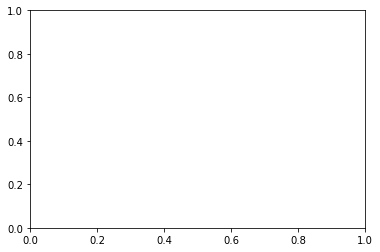

In [307]:
plt.figure()
plt.scatter(Xr, yr, s = 20, edgecolor = "black",
            c = "darkorange", label = "data")
plt.plot(test_x, region, linewidth = 0)
plt.xlabel("Values")
plt.ylabel("Year")
plt.title("Multinomial Regression")
plt.legend()
plt.show()